In [1083]:
# Importing all the requisite libraries

import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings

warnings.simplefilter('ignore')

sns.set(color_codes=True)
%matplotlib inline 

# 1. Loading the dataset

In [1084]:
# Converted the data file to .xlsx format
# Reading the dataset

pd_df = pd.read_excel(r'C:\Users\rdsri\OneDrive\Parkinson_ensemble.xlsx')#,index_col=0)

In [1085]:
# Using head() function to check whether the data is fetched or not
# Displaying the first 10 rows of the dataframe

pd_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6,phon_R01_S02_1,phon_R01_S02_2,phon_R01_S02_3,phon_R01_S02_4
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011,8e-05,3e-05,3e-05,6e-05,6e-05
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655,0.00463,0.00155,0.00144,0.00293,0.00268
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908,0.0075,0.00202,0.00182,0.00332,0.00332
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966,0.01388,0.00466,0.00431,0.0088,0.00803
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838


 # 2. Performing basic Exploratory Data Analysis

In [1086]:
# Checking the dimension of the dataframe
pd_df.shape

(195, 24)

The insurance dataframe contains 195 instances with 24 attributes

In [1087]:
# Checking for missing values in the dataset
pd_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no missing values found in the dataset

In [1088]:
# Checking for the data type of each attribute in the dataset
pd_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [1089]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In the dataset, there are the following Independent variables which are all of data type 'Float64':-

- Name - ASCII subject name and recording number  _<b>(This is an insignificant attribute which will be dropped later)</b>_
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ and Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ and Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- Spread1,Spread2,PPE - Three nonlinear measures of fundamental frequency variation 

And the target variable is 'Status' which is of the data type 'Int64'.

- Status - Health status of the subject (1) - Parkinson's, (0) - Healthy

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics

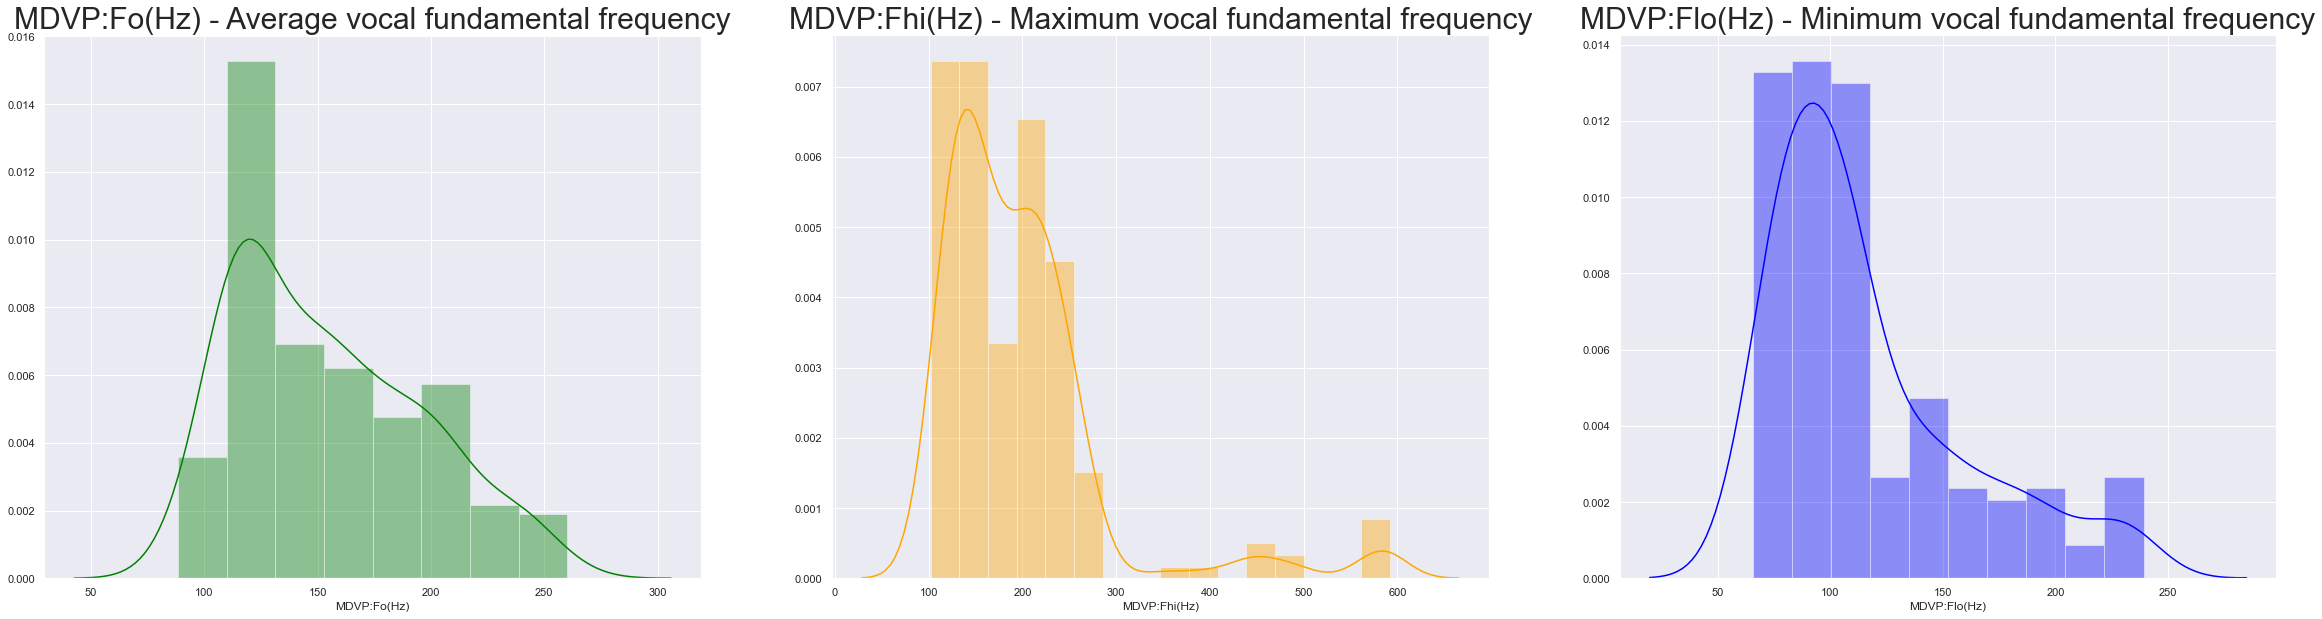

In [1090]:
plt.figure(figsize=(40,10))

# Multi Dimensional Voice Program 
    
# MDVP:Fo(Hz) - Average vocal fundamental frequency
plt.subplot(1,3,1)
plt.title(label = 'MDVP:Fo(Hz) - Average vocal fundamental frequency', fontsize = 30)
sns.distplot(pd_df['MDVP:Fo(Hz)'],color='Green')

# MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
plt.subplot(1,3,2)
plt.title(label = 'MDVP:Fhi(Hz) - Maximum vocal fundamental frequency', fontsize = 30)
sns.distplot(pd_df['MDVP:Fhi(Hz)'], color='Orange')

# MDVP:Flo(Hz) - Minimum vocal fundamental frequency
plt.subplot(1,3,3)
plt.title(label = 'MDVP:Flo(Hz) - Minimum vocal fundamental frequency', fontsize = 30)
sns.distplot(pd_df['MDVP:Flo(Hz)'], color='Blue')



plt.show()       #Displaying all the figures

Here, there is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

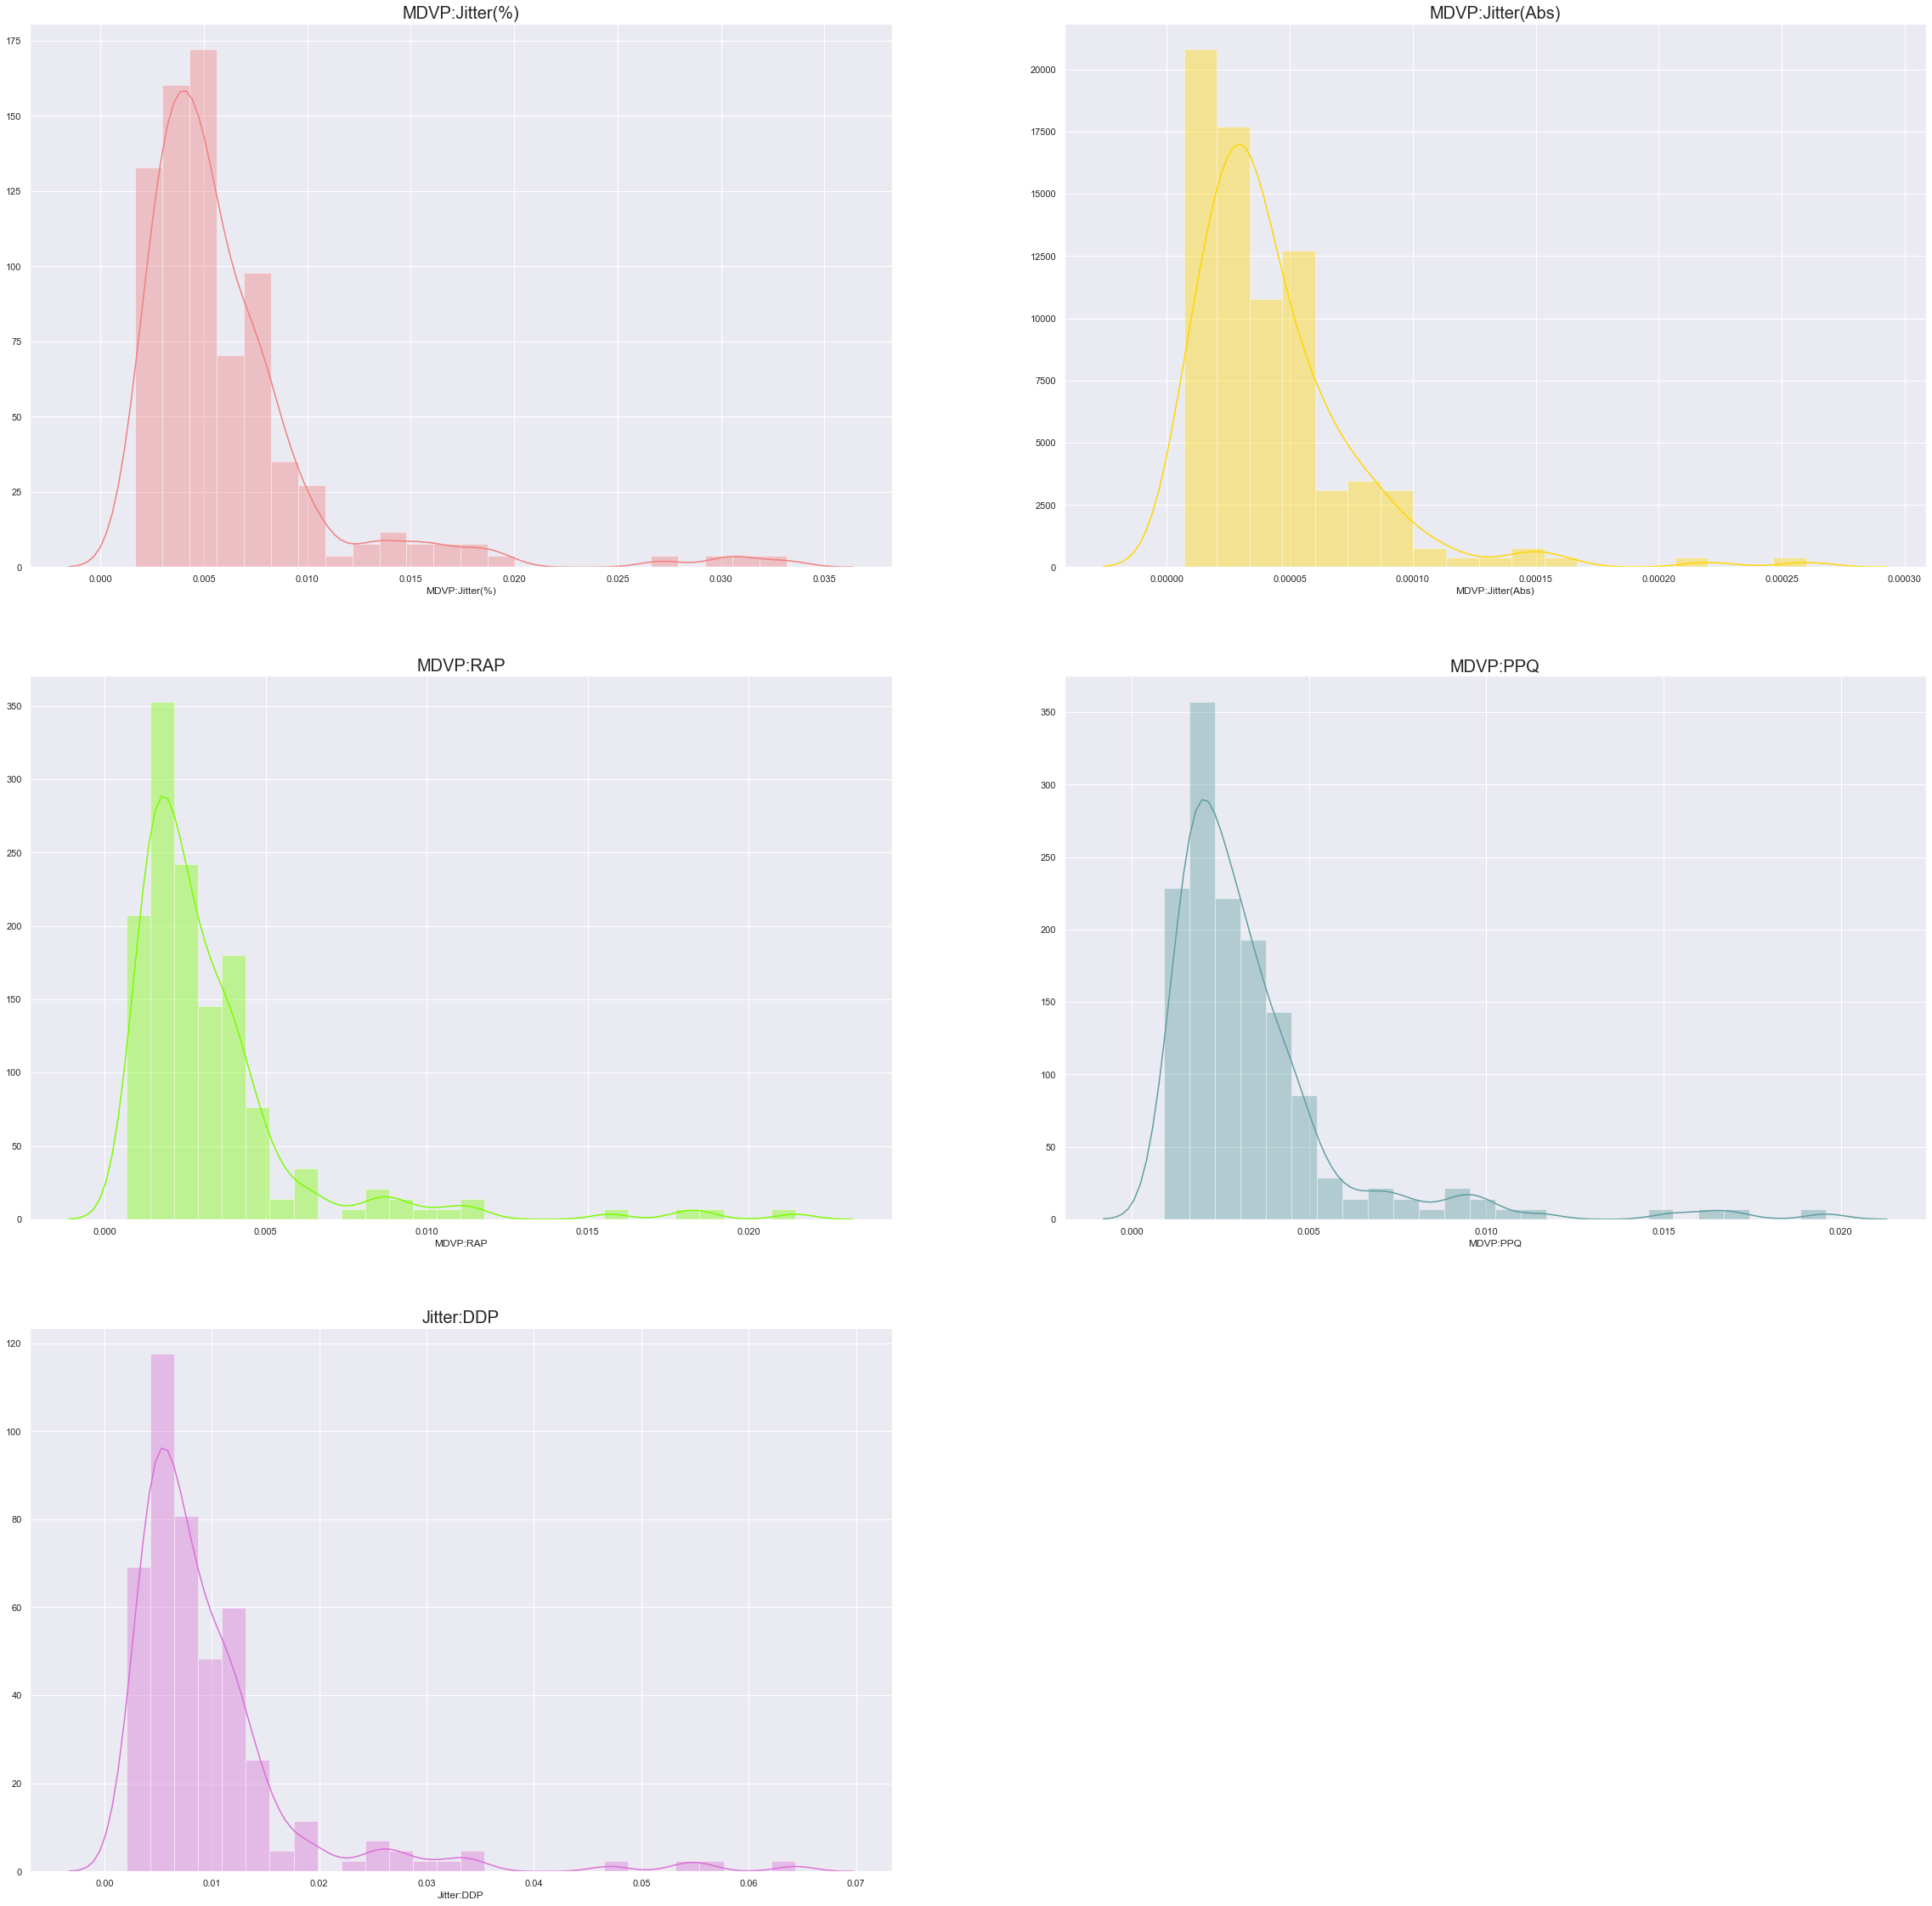

In [1091]:
plt.figure(figsize=(40,40))

# Several other measures of Multi Dimensional Voice Program variations in Fundamental Frequency

#Distribution of MDVP:Jitter(%)
plt.subplot(3,2,1)
plt.title(label = 'MDVP:Jitter(%)', fontsize = 20)
sns.distplot(pd_df['MDVP:Jitter(%)'],color='Lightcoral')

#Distribution of MDVP:Jitter(Abs)
plt.subplot(3,2,2)
plt.title(label = 'MDVP:Jitter(Abs)', fontsize = 20)
sns.distplot(pd_df['MDVP:Jitter(Abs)'], color='Gold')

#Distribution of MDVP:RAP
plt.subplot(3,2,3)
plt.title(label = 'MDVP:RAP', fontsize = 20)
sns.distplot(pd_df['MDVP:RAP'], color='Lawngreen')

#Distribution of MDVP:PPQ
plt.subplot(3,2,4)
plt.title(label = 'MDVP:PPQ', fontsize = 20)
sns.distplot(pd_df['MDVP:PPQ'],color='Cadetblue')

#Distribution of Jitter:DDP 
plt.subplot(3,2,5)
plt.title(label = 'Jitter:DDP', fontsize = 20)
sns.distplot(pd_df['Jitter:DDP'], color='Orchid')

plt.show()       #Displaying all the figures

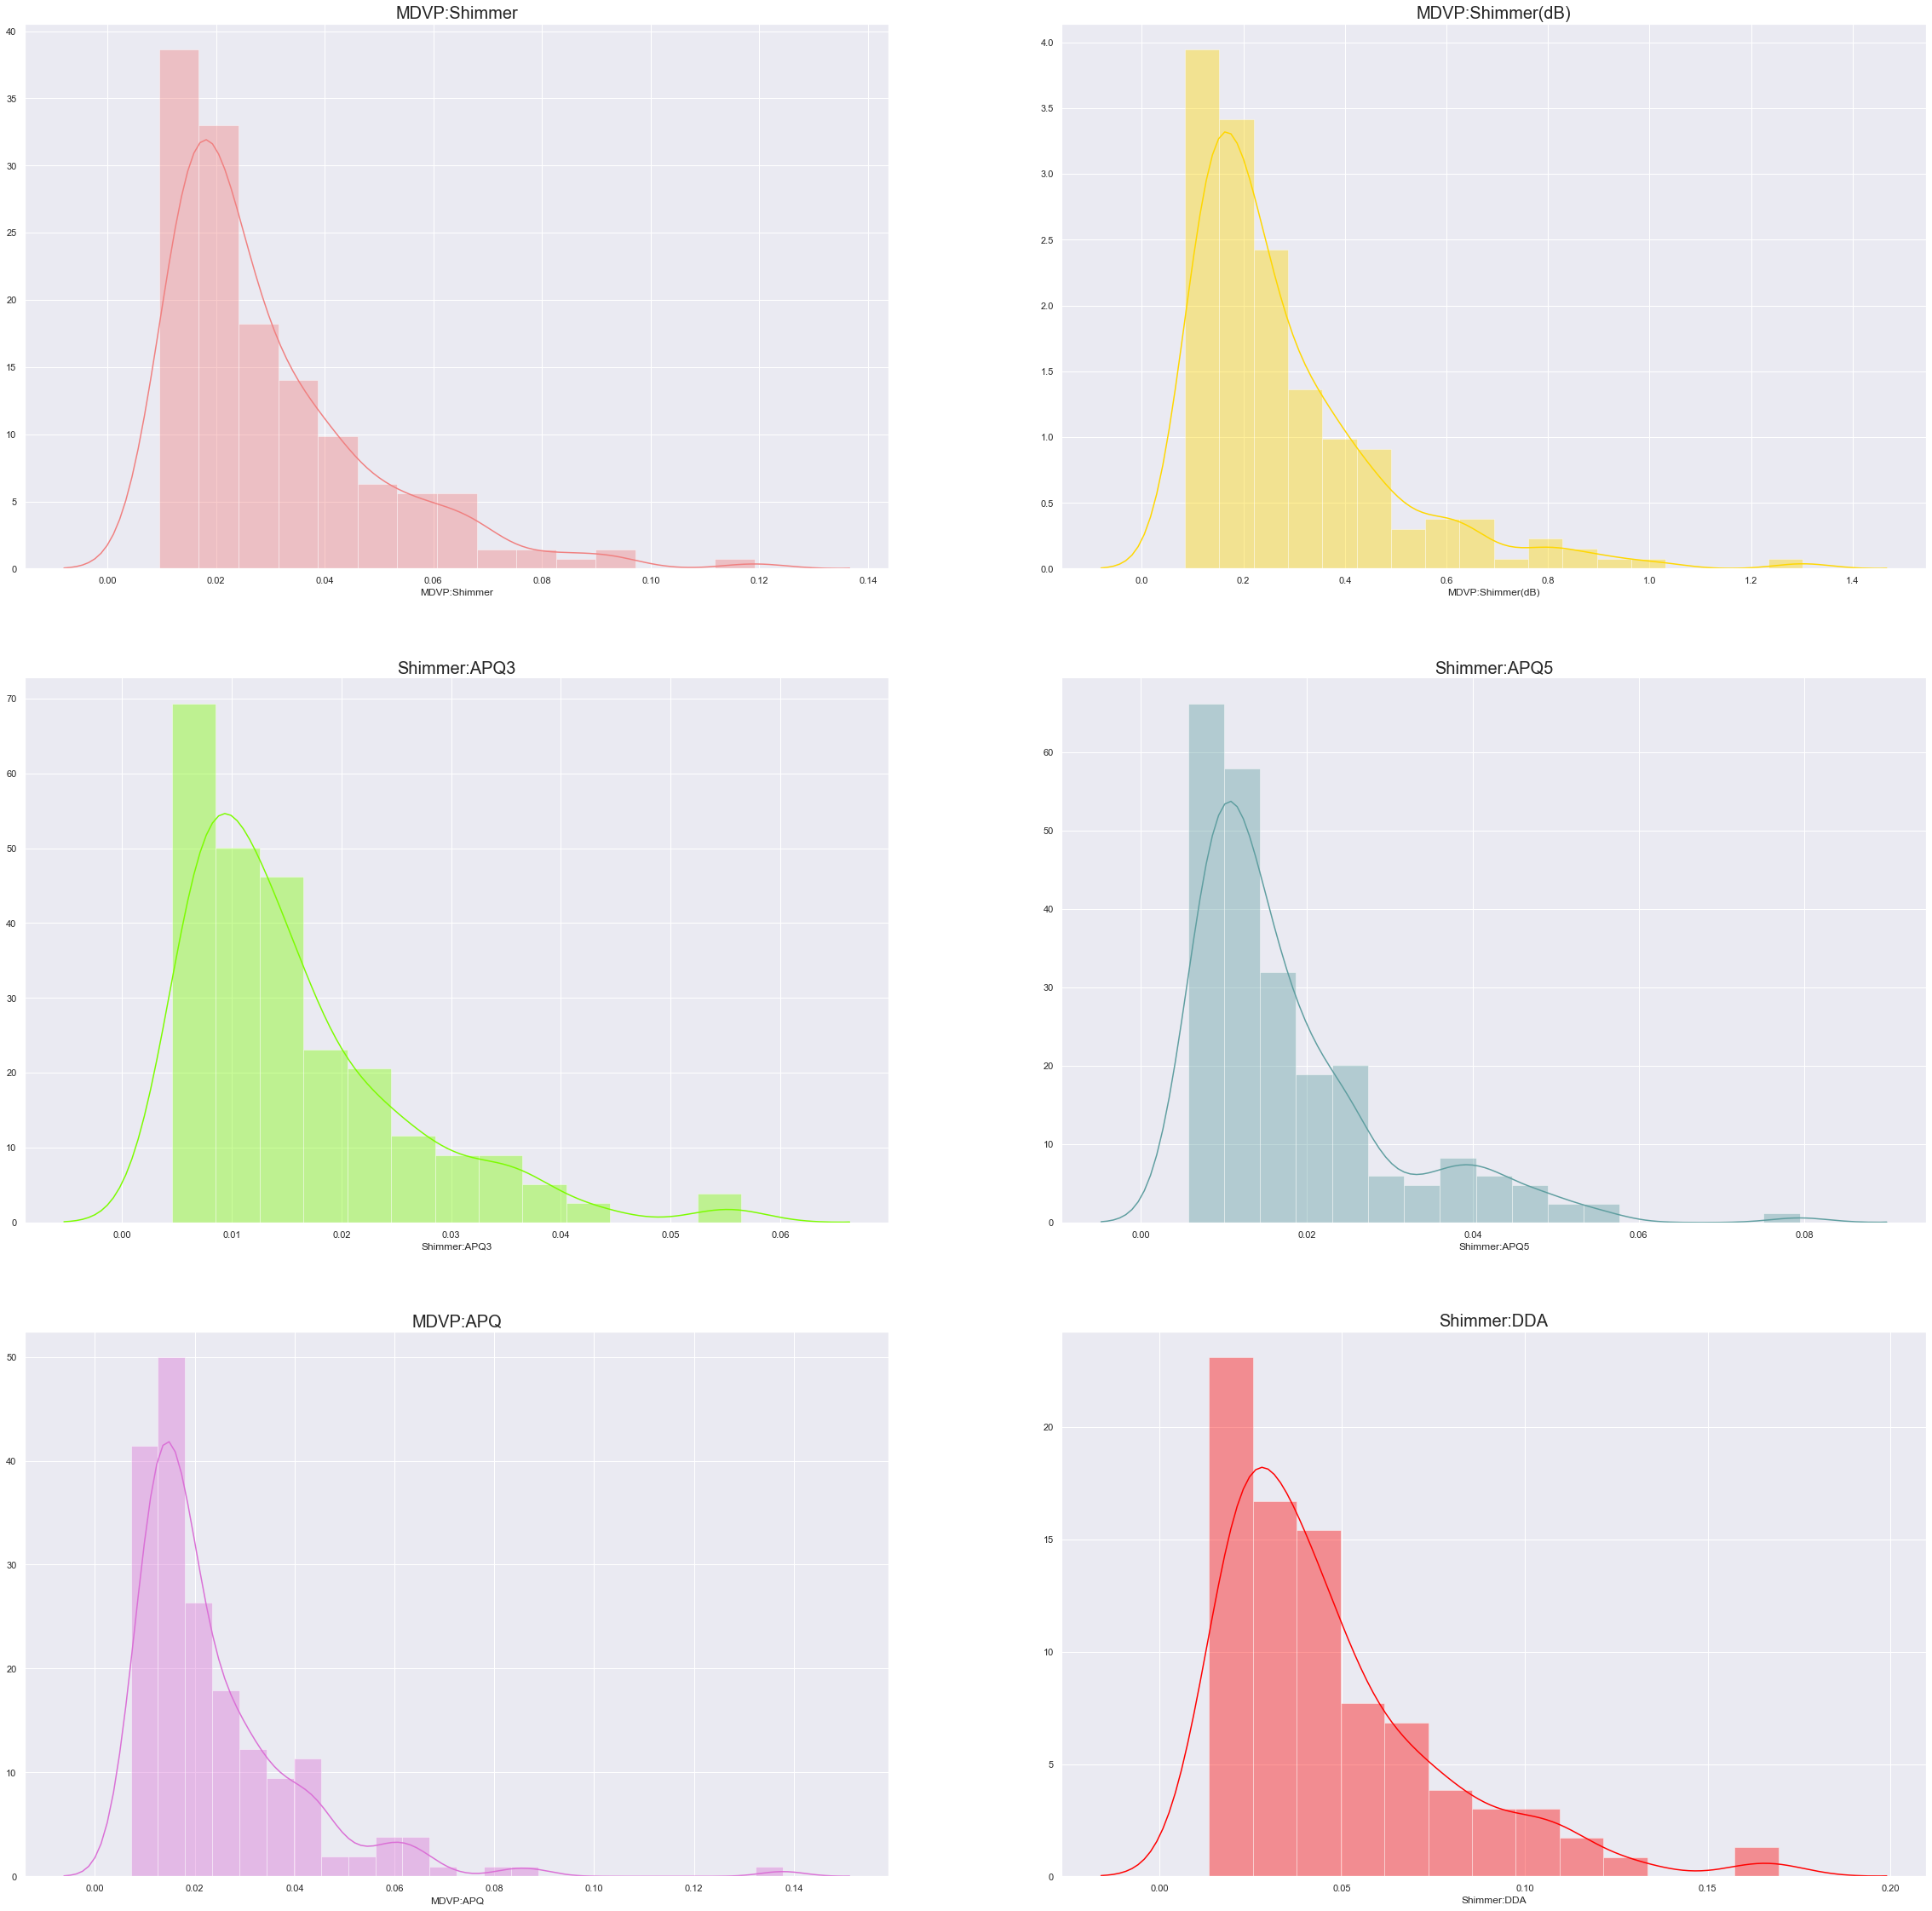

In [1092]:
plt.figure(figsize=(40,40))

# Several other measures of Multi Dimensional Voice Program variations in amplitude
                        
#Distribution of MDVP:Shimmer
plt.subplot(3,2,1)
plt.title(label = 'MDVP:Shimmer', fontsize = 20)
sns.distplot(pd_df['MDVP:Shimmer'],color='Lightcoral')

#Distribution of MDVP:Shimmer(dB)
plt.subplot(3,2,2)
plt.title(label = 'MDVP:Shimmer(dB)', fontsize = 20)
sns.distplot(pd_df['MDVP:Shimmer(dB)'], color='Gold')

#Distribution of Shimmer:APQ3
plt.subplot(3,2,3)
plt.title(label = 'Shimmer:APQ3', fontsize = 20)
sns.distplot(pd_df['Shimmer:APQ3'], color='Lawngreen')

#Distribution of Shimmer:APQ5
plt.subplot(3,2,4)
plt.title(label = 'Shimmer:APQ5', fontsize = 20)
sns.distplot(pd_df['Shimmer:APQ5'],color='Cadetblue')

#Distribution of MDVP:APQ
plt.subplot(3,2,5)
plt.title(label = 'MDVP:APQ', fontsize = 20)
sns.distplot(pd_df['MDVP:APQ'], color='Orchid')

#Distribution of Shimmer:DDA
plt.subplot(3,2,6)
plt.title(label = 'Shimmer:DDA', fontsize = 20)
sns.distplot(pd_df['Shimmer:DDA'], color='Red')

plt.show()       #Displaying all the figures

All are positively skewed.

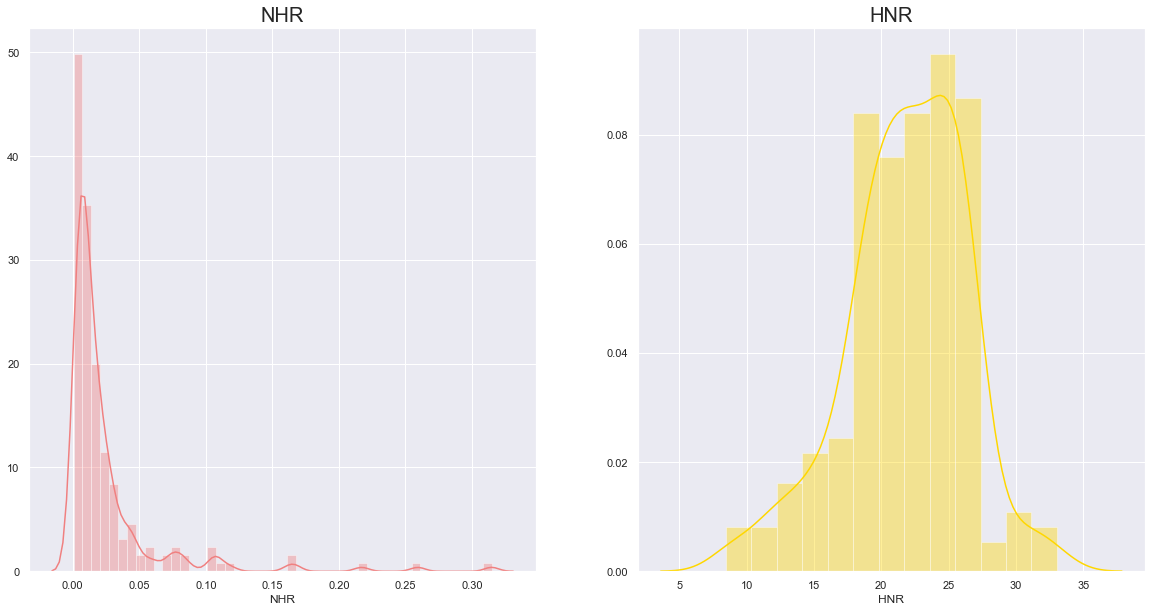

In [1093]:
plt.figure(figsize=(20,10))

# Two measures of ratio of noise to tonal components in the voice
                        
#Distribution of NHR
plt.subplot(1,2,1)
plt.title(label = 'NHR', fontsize = 20)
sns.distplot(pd_df['NHR'],color='Lightcoral')

#Distribution of HNR
plt.subplot(1,2,2)
plt.title(label = 'HNR', fontsize = 20)
sns.distplot(pd_df['HNR'], color='Gold')

plt.show()       #Displaying all the figures

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04. The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness.

In [1094]:
# Checking the number of affected people
pd_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

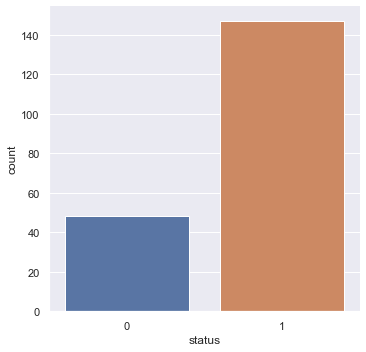

In [1095]:
sns.catplot(x='status',kind='count',data=pd_df)
plt.show()

There are 147 people affected by Parkinson's Disease & 48 people unaffected.

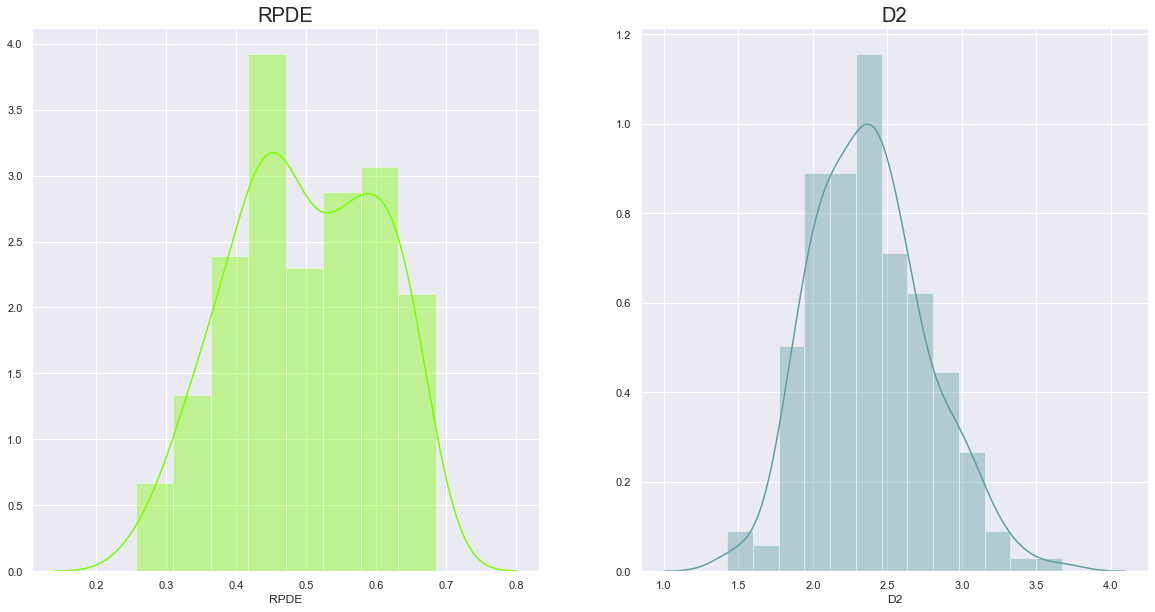

In [1096]:
 plt.figure(figsize=(20,10))

# Two nonlinear dynamical complexity measures
       
#Distribution of RPDE
plt.subplot(1,2,1)
plt.title(label = 'RPDE', fontsize = 20)
sns.distplot(pd_df['RPDE'],color='Lawngreen')

#Distribution of D2
plt.subplot(1,2,2)
plt.title(label = 'D2', fontsize = 20)
sns.distplot(pd_df['D2'], color='Cadetblue')

plt.show()       #Displaying all the figures

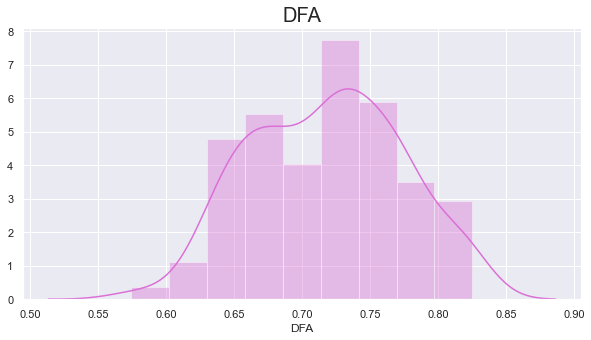

In [1097]:
plt.figure(figsize=(10,5))

# Signal fractal scaling exponent 

#Distribution of DFA
plt.subplot(1,1,1)
plt.title(label = 'DFA', fontsize = 20)
sns.distplot(pd_df['DFA'],color='Orchid')

plt.show()       #Displaying all the figures

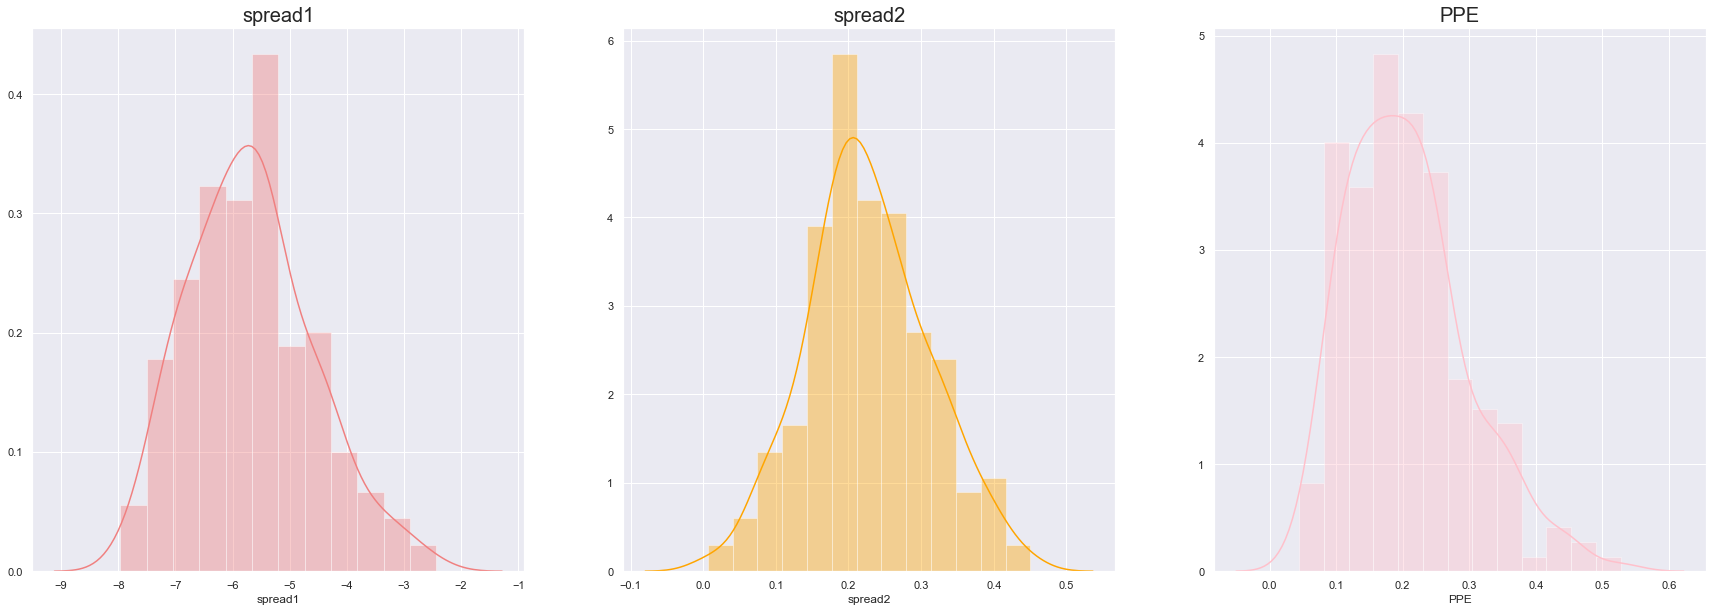

In [1098]:
 plt.figure(figsize=(30,10))

# Three nonlinear measures of fundamental frequency variation
       
#Distribution of spread1
plt.subplot(1,3,1)
plt.title(label = 'spread1', fontsize = 20)
sns.distplot(pd_df['spread1'],color='Lightcoral')

#Distribution of spread2
plt.subplot(1,3,2)
plt.title(label = 'spread2', fontsize = 20)
sns.distplot(pd_df['spread2'], color='Orange')
    
#Distribution of PPE
plt.subplot(1,3,3)
plt.title(label = 'PPE', fontsize = 20)
sns.distplot(pd_df['PPE'],color='Pink')

plt.show()       #Displaying all the figures

### Bivariate distribution of attributes based on the target columns

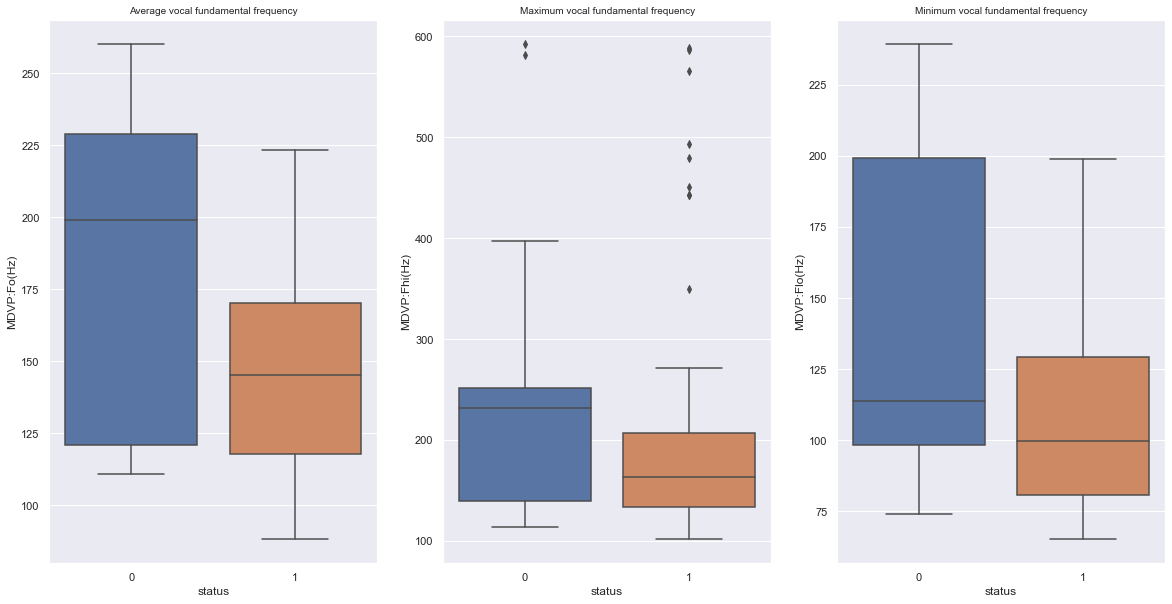

In [1099]:
# Distribution of local MDVP Attributes

plt.figure(figsize=(20,10))
         
#Distribution of MDVP:Fo(Hz)
plt.subplot(1,3,1)
plt.title(label = 'Average vocal fundamental frequency', fontsize = 10)
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=pd_df,)

# Distribution of MDVP:Fhi(Hz)
plt.subplot(1,3,2)
plt.title(label = 'Maximum vocal fundamental frequency', fontsize = 10)
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=pd_df)

#Distribution of MDVP:Flo(Hz) 
plt.subplot(1,3,3)
plt.title(label = 'Minimum vocal fundamental frequency', fontsize = 10)
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=pd_df)

plt.show()

When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

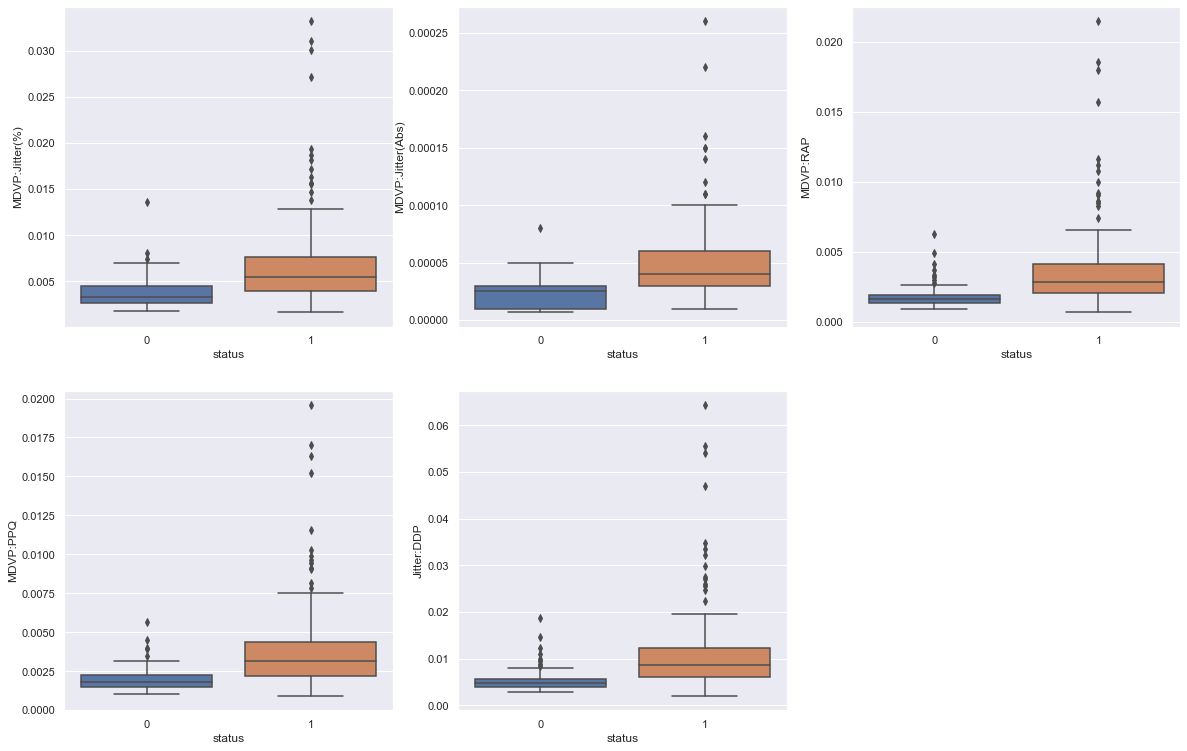

In [1100]:
#Distribution of MDVP:Jitter(%)
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=pd_df)
# plt.show()

#Distribution of MDVP:Jitter(Abs)
plt.subplot(3,3,2)
sns.boxplot(x='status',y='MDVP:Jitter(Abs)',data=pd_df)
# plt.show()

#Distribution of MDVP:RAP 
plt.subplot(3,3,3)
sns.boxplot(x='status',y='MDVP:RAP',data=pd_df)
# plt.show()

#Distribution of MDVP:PPQ
plt.subplot(3,3,4)
sns.boxplot(x='status',y='MDVP:PPQ',data=pd_df)
# plt.show()

#Distribution of Jitter:DDP
plt.subplot(3,3,5)
sns.boxplot(x='status',y='Jitter:DDP',data=pd_df)

plt.show()

People who are suffering for Parkinson's Disease tend to have higher jitter %. It seems if the values goes above 0.15 we can confirm the patient is having PD. The variation of fundamental frequency is in a low range for people who is normal.

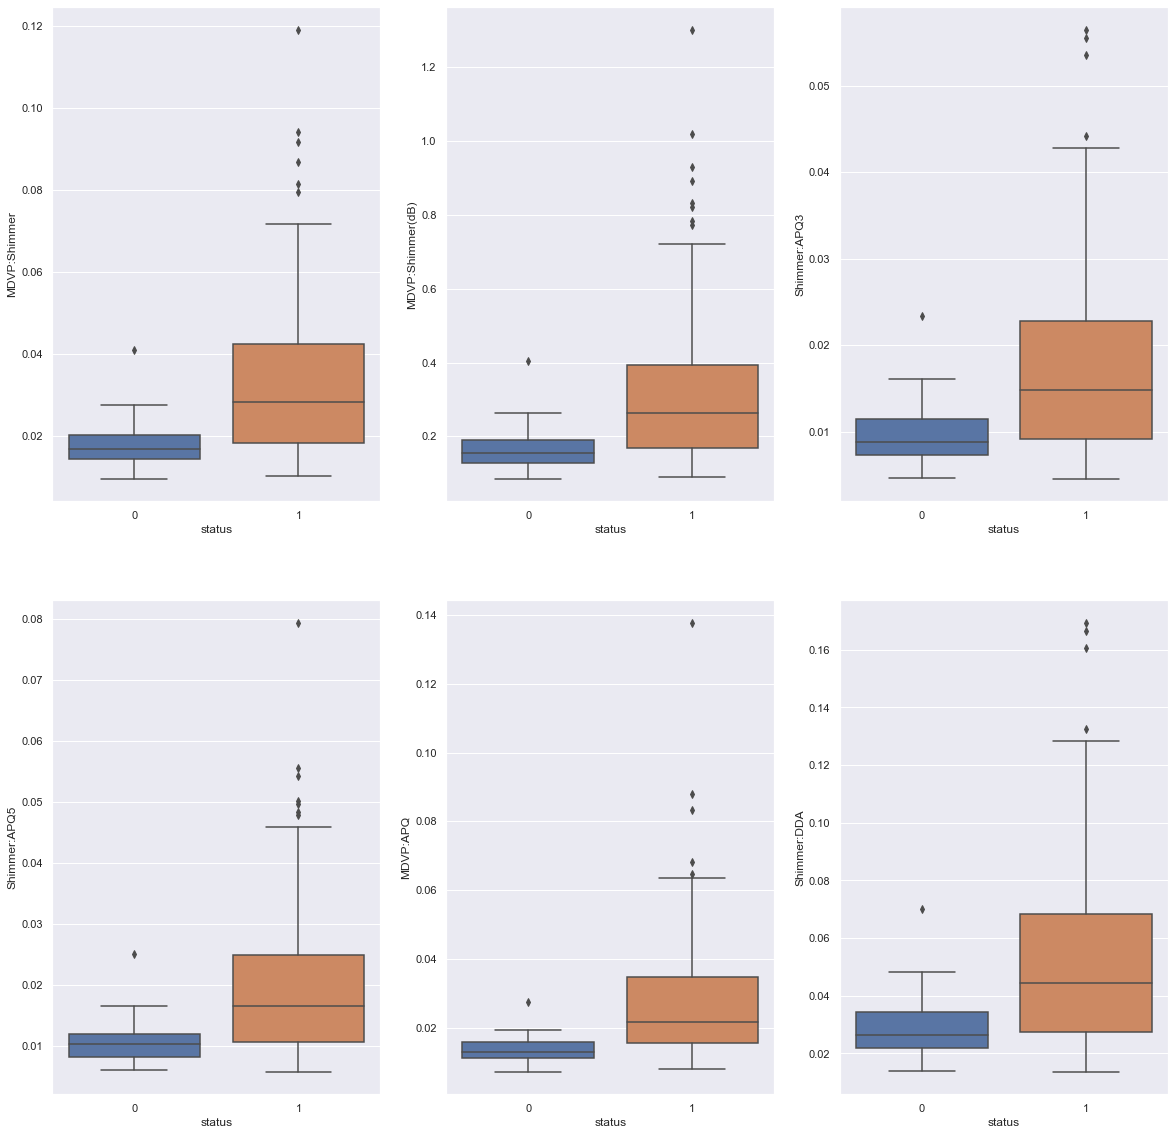

In [1101]:
#Distribution of MDVP:Shimmer

plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
sns.boxplot(x='status',y='MDVP:Shimmer',data=pd_df) 
# plt.show()

#Distribution of MDVP:Shimmer(dB)
plt.subplot(2,3,2)
sns.boxplot(x='status',y='MDVP:Shimmer(dB)',data=pd_df)
# plt.show()

#Distribution of Shimmer:APQ3
plt.subplot(2,3,3)
sns.boxplot(x='status',y='Shimmer:APQ3',data=pd_df) 
# plt.show()

#Distribution of Shimmer:APQ5
plt.subplot(2,3,4)
sns.boxplot(x='status',y='Shimmer:APQ5',data=pd_df)
# plt.show()

#Distribution of MDVP:APQ
plt.subplot(2,3,5)
sns.boxplot(x='status',y='MDVP:APQ',data=pd_df) 
# plt.show()

#Distribution of Shimmer:DDA
plt.subplot(2,3,6)
sns.boxplot(x='status',y='Shimmer:DDA',data=pd_df)

plt.show()

People who have Parkinson's Disease have higher levels of MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ & Shimmer:DDA

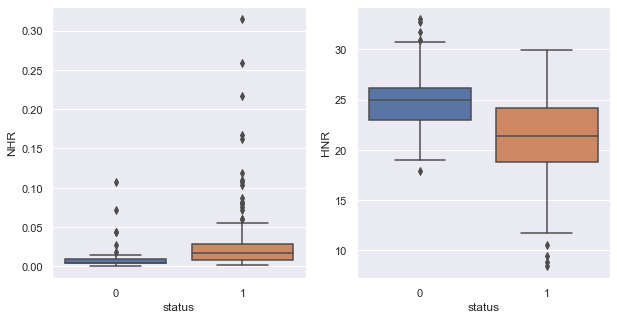

In [1102]:
#Distribution of NHR

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='status',y='NHR',data=pd_df)

#Distribution of HNR
plt.subplot(1,2,2)
sns.boxplot(x='status',y='HNR',data=pd_df)

plt.show()

People who have Parkinson's Disease have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio, people who have Parkinson's Disease have lower levels in the same.

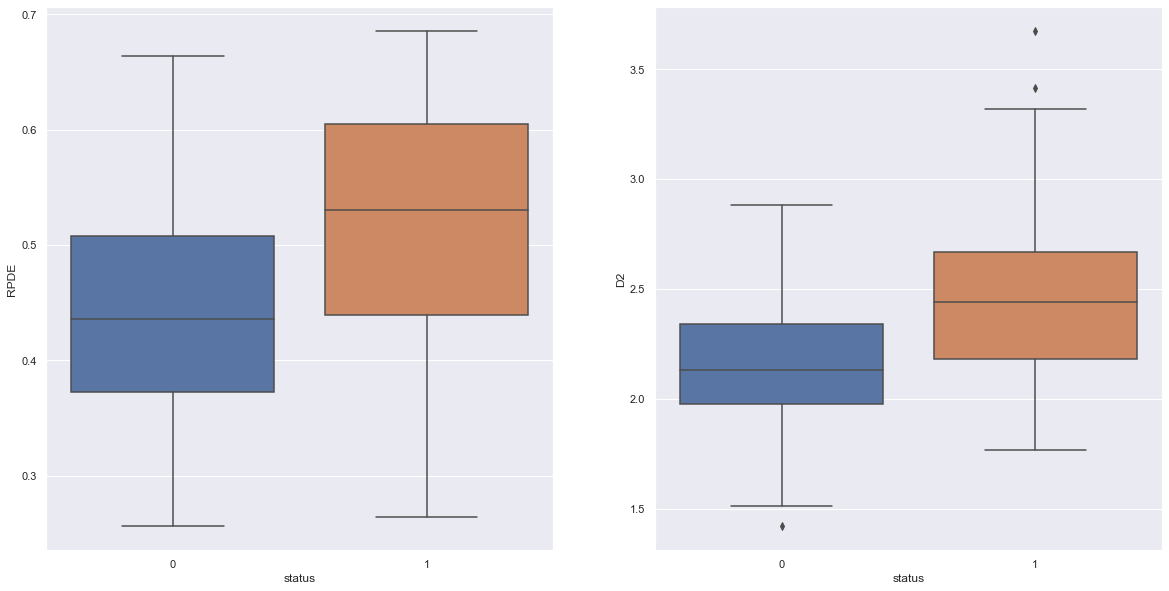

In [1103]:
plt.figure(figsize=(20,10))

#Distribution of RPDE
plt.subplot(1,2,1)
sns.boxplot(x='status',y='RPDE',data=pd_df)

#Distribution of D2
plt.subplot(1,2,2)
sns.boxplot(x='status',y='D2',data=pd_df)

plt.show()

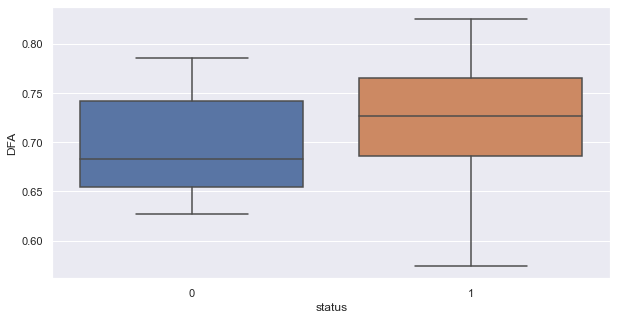

In [1104]:
plt.figure(figsize=(10,5))

#Distribution of DFA
sns.boxplot(x='status',y='DFA',data=pd_df)

plt.show()

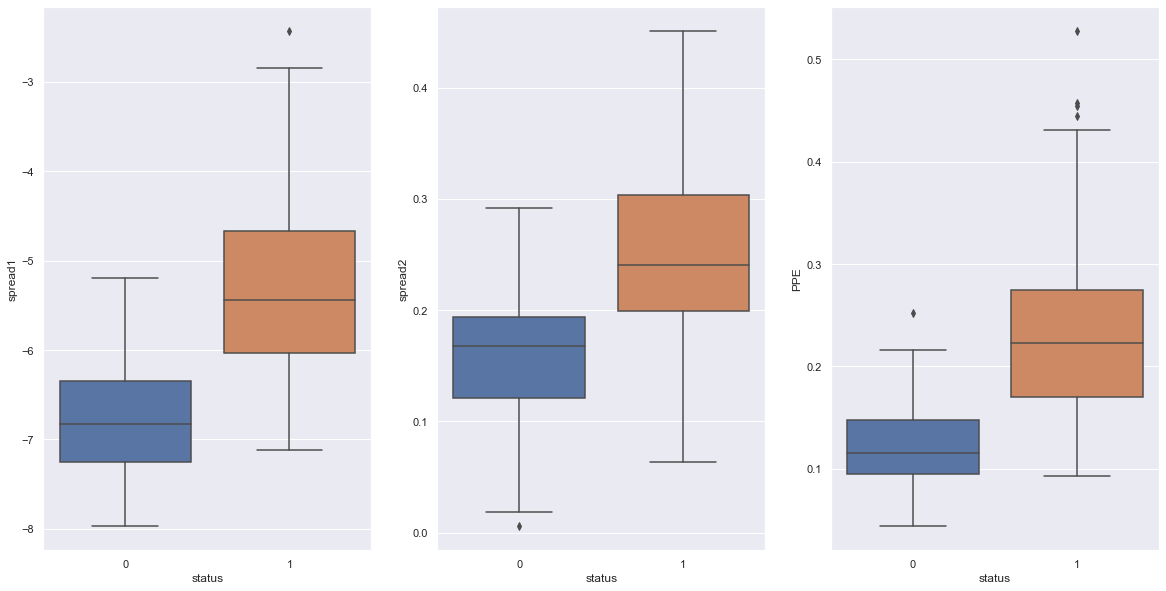

In [1105]:
plt.figure(figsize=(20,10))

#Distribution of spread1
plt.subplot(1,3,1)
sns.boxplot(x='status',y='spread1',data=pd_df)

#Distribution of spread2
plt.subplot(1,3,2)
sns.boxplot(x='status',y='spread2',data=pd_df) 

#Distribution of  PPE
plt.subplot(1,3,3)
sns.boxplot(x='status',y='PPE',data=pd_df)

plt.show()       

- People who have spread1 between - 8.5 and -7.5 are healthy. 
- People whose spread1 is between -6.5 and -5 are having Parkinson's Disease
- People who have spread2 between 0.0 and 0.3 are healthy. 
- People whose spread2 is starting from 0.05 and reads beyond 0.4 are having Parkinson's Disease

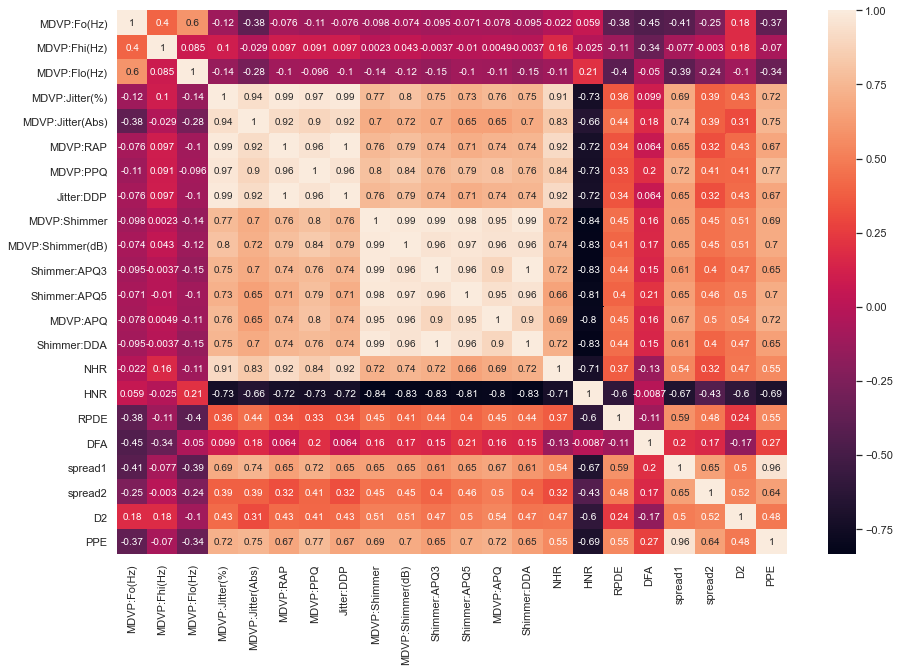

In [1106]:
# Checking for the correlation between the attributes

new_df = pd_df.drop('status',axis=1)
# new_df.columns

pd_corr = new_df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(pd_corr,annot=True)

plt.show()

-  MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP
- MDVP:Shimmer has a very high correlation with MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA this may be because they are related to each other.
- HNR has a very low correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA & NHR

# 4. Scaling the data & getting rid of missing values (if any)

In [1107]:
# Normalizing the data using the minmax scaler to bring the feature variables within the range -1 to 1

x = pd_df.drop(['status','name'],axis=1)
y = pd_df['status']
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(x)

#### No missing values found in the dataset.

#### Scaled the data using MinMaxScaler
Since the dataset contains raw data and the range of values of this data varies widely. I have normalized it to bound the values between the range -1 & 1. Because a majority of classifiers calculate the distance between two points by the distance. If features have a broad range of values, the distance governs this particular feature. Therefore, normalizing the range of all features so that each feature contributes approximately proportionately to the final distance.

# 5. Splitting the dataset into training and test set in the ratio of 70:30 

In [1185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=40)

In [1109]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pd_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pd_df.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [1110]:
print(len(X_train)),print(len(X_test))

136
59


(None, None)

# 6. Training Standard Classification Algorithms & noting down the accuracy

  Below are the standard classification model used:
  - Logistic Regression Algorithm
  - K Nearest Neighbour Algorithm
  - Gaussian Naiye Bayes Algorithm
  - Support Vector Machines Algorithm

### Logistic Regression Algorithm

In [1111]:
# Fitting the logistic model on training set

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)

In [1112]:
print('Accuracy of logistic regression classifier on training set: {:.2f}%'.format(logistic_model.score(X_train, y_train)*100))
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logistic_model.score(X_test,y_test)*100))

Accuracy of logistic regression classifier on training set: 86.76%
Accuracy of logistic regression classifier on test set: 91.53%


### K Nearest Neighbour Algorithm

In [1113]:
# Keeping number of neighbours as 3
# Using distance where weight points are measured by the inverse of their distance. 
# So, in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

NNH = KNeighborsClassifier(n_neighbors= 3, weights = 'distance' )  
NNH.fit(X_train, y_train)
y_pred_knn = NNH.predict(X_test)

In [1114]:
print('Accuracy of K Neighbours Classifier on training set: {:.2f}%'.format(NNH.score(X_train, y_train)*100))
print('Accuracy of K Neighbours Classifier on test set: {:.2f}%'.format(NNH.score(X_test, y_test)*100))

Accuracy of K Neighbours Classifier on training set: 100.00%
Accuracy of K Neighbours Classifier on test set: 96.61%


### Gaussian Naiye Bayes Algorithm

In [1115]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_gnb = GNB.predict(X_test)

In [1116]:
print('Accuracy of Gaussian Naiye Bayes on training set: {:.2f}%'.format(GNB.score(X_train, y_train)*100))
print('Accuracy of Gaussian Naiye Bayes on test set: {:.2f}%'.format(GNB.score(X_test, y_test)*100))

Accuracy of Gaussian Naiye Bayes on training set: 72.06%
Accuracy of Gaussian Naiye Bayes on test set: 67.80%


### Support Vector Machines Algorithm

In [1117]:
svm_cl = svm.SVC(gamma=0.025, C=3, probability=True)

In [1118]:
# Fitting the model

svm_cl.fit(X_train,y_train)

SVC(C=3, gamma=0.025, probability=True)

In [1119]:
y_pred_svc = svm_cl.predict(X_test)

In [1120]:
print('Accuracy of SVM on training set: {:.2f}%'.format(svm_cl.score(X_train, y_train)*100))
print('Accuracy of SVM on test set: {:.2f}%'.format(svm_cl.score(X_test, y_test)*100))

Accuracy of SVM on training set: 86.76%
Accuracy of SVM on test set: 89.83%


# 7. Training a Meta Classifier & noting down the accuracy

   Here, the Meta classifier used is <i>Logistic Regression Algorithm</i>. And I have used three base classifiers:-
   - Support Vector Machines
   - Decision Tree Classifiers
   - Random Forest Classifiers
   

In [1121]:
# Creating an array to store the mean & standard deviation which will be used duirng visualization

accuracy_mean = []    #Array to store mean values
accuracy_std = []     #Array to store standard deviation values

svm_clf = SVC(gamma=0.025, C=3)
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
rf_clf = RandomForestClassifier(random_state=1)
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[svm_clf, dt_clf, rf_clf], 
                          meta_classifier=lr)

print('Cross Validation Score')
print('----------------------')

for clf, label in zip([svm_clf, dt_clf, rf_clf, sclf], ['SVM', 'Decision Tree', 'Random Forest', 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy:  %0.2f (+/- (%0.2f) [%s]" % (scores.mean(), scores.std(), label))
    accuracy_mean.append(np.round(scores.mean(),2))
    accuracy_std.append(np.round(scores.std(),2))
    

Cross Validation Score
----------------------
Accuracy:  0.87 (+/- (0.08) [SVM]
Accuracy:  0.84 (+/- (0.06) [Decision Tree]
Accuracy:  0.83 (+/- (0.05) [Random Forest]
Accuracy:  0.83 (+/- (0.05) [StackingClassifier]


In [1122]:
#Fitting the training data

sclf.fit(X_train,y_train)
y_pred_meta = sclf.predict(X_test)

In [1123]:
print('Accuracy of Meta Classifier on training set: {:.2f}%'.format(sclf.score(X_train,y_train)*100))
print('Accuracy of Meta Classifier on test set: {:.2f}%'.format(sclf.score(X_test, y_test)*100))

Accuracy of Meta Classifier on training set: 100.00%
Accuracy of Meta Classifier on test set: 88.14%


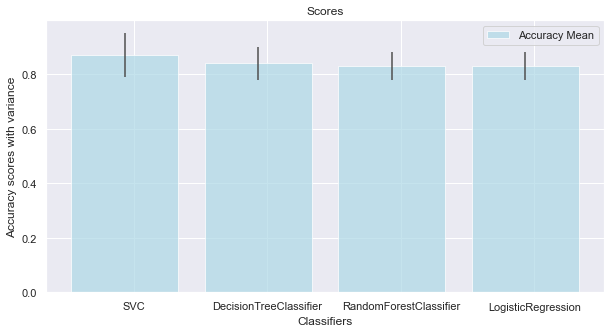

In [1124]:
# Visualizing the stacked classifiers

# Storing the classifier names in a  new array
classifier_array = [svm_clf, dt_clf,rf_clf,lr]
labels = [clf.__class__.__name__ for clf in classifier_array]

#Plotting the graph

fig, ax = plt.subplots(figsize=(10,5))
n_groups = 4
index = np.arange(n_groups)
# index = labels
bar_width = 0.8
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, accuracy_mean, bar_width, alpha=opacity, color='Lightblue', yerr=accuracy_std, error_kw=error_config, label='Accuracy Mean')
# bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Scores')
ax.set_xticks(index + bar_width/12)
ax.set_xticklabels((labels))
ax.legend()

plt.show()

# 8. Training Ensemble models & noting down the accuracy

   Below are the Ensemble Models used:
   
   - Decision Tree Classifier
   - Bagging Classifier
   - Random Forest Classifier
   - AdaBoosting Classifier
   - Gradient Classifier
   - Extra Tree Classifier

### Decision Tree Classifier

In [1125]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=100,min_samples_leaf=5)
dTree.fit(X_train, y_train)
y_pred_dt = dTree.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}%'.format(dTree.score(X_train, y_train)*100))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}%'.format(dTree.score(X_test, y_test)*100))

Accuracy of Decision Tree Classifier on training set: 94.85%
Accuracy of Decision Tree Classifier on test set: 93.22%


<Figure size 2880x720 with 0 Axes>

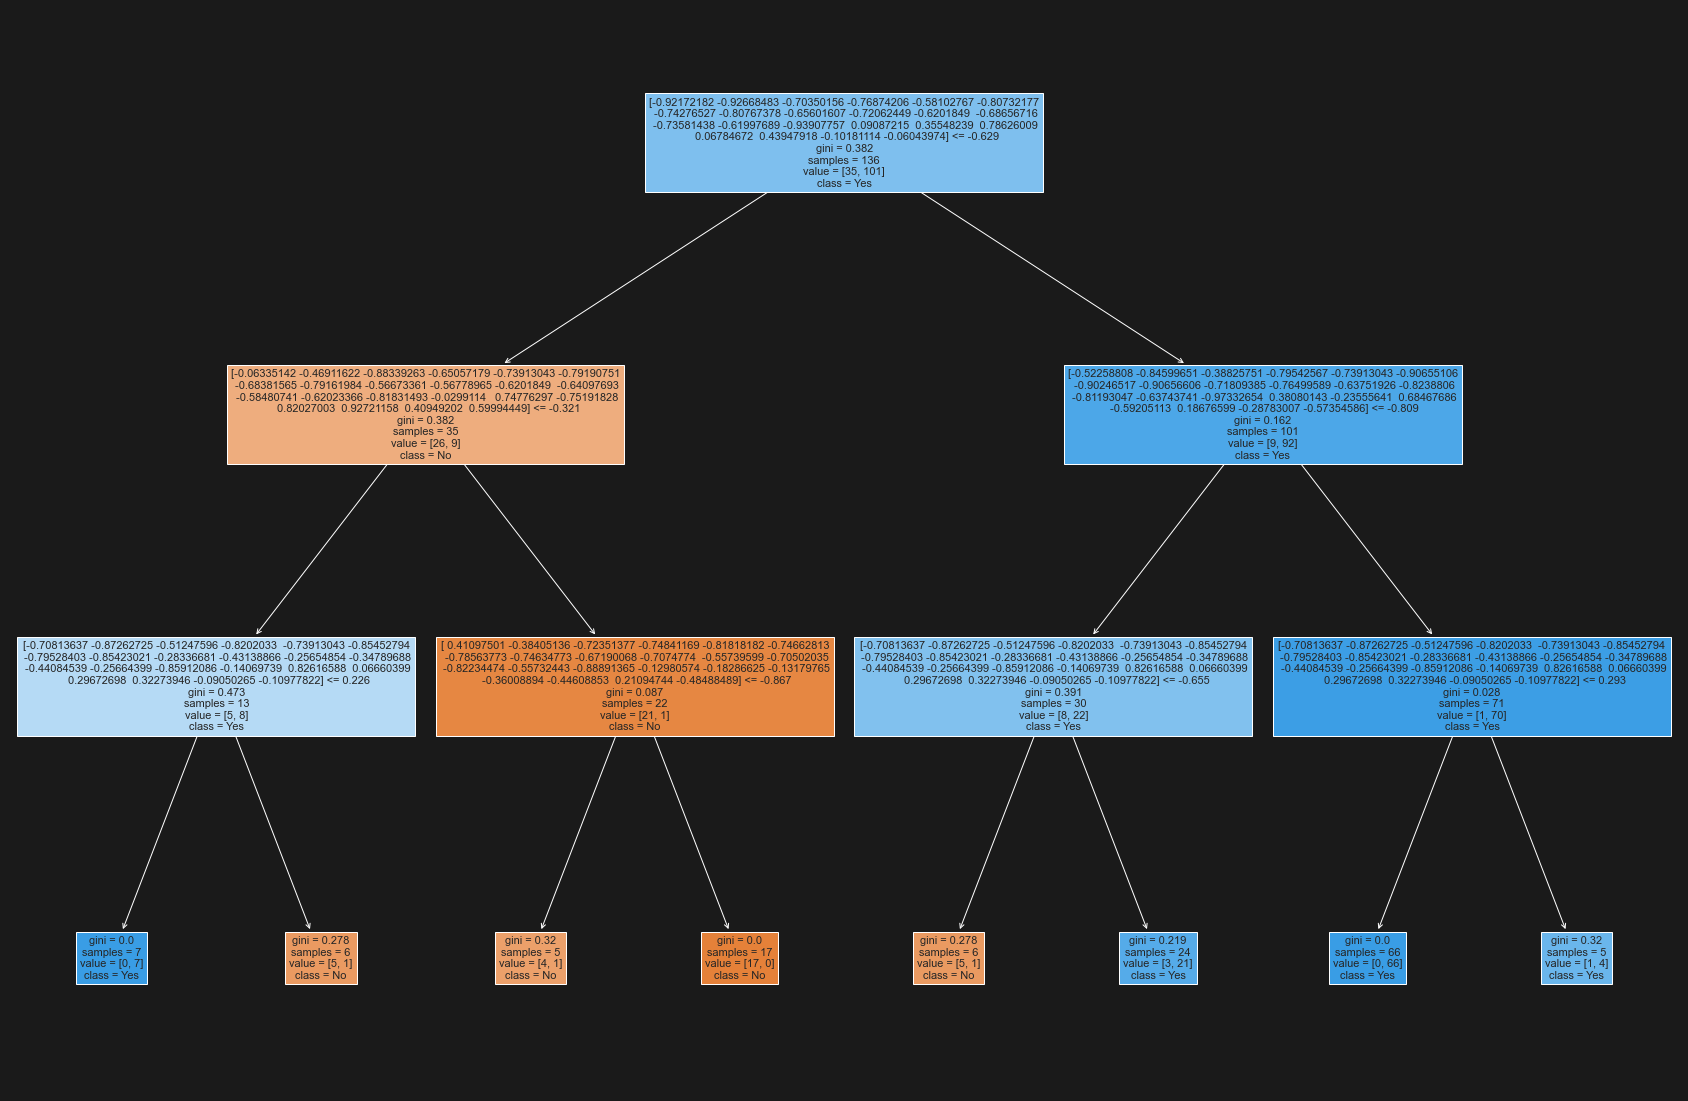

In [1126]:
#Visualizing the Decision tree

plt.figure(figsize=(40,10))

fn = list(X_train)
cn = ['No', 'Yes']

fig, axes = plt.subplots(figsize = (30, 20), facecolor='k')
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True, fontsize=11, ax = axes)
# fig.savefig('tree.png')

plt.show()

### Bagging Classifier

In [1127]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
# bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
y_pred_bg= bgcl.predict(X_test)

In [1128]:
print('Accuracy of Bagging Classifier on training set: {:.2f}%'.format(bgcl.score(X_train , y_train)*100))
print('Accuracy of Bagging Classifier on test set: {:.2f}%'.format(bgcl.score(X_test , y_test)*100))

Accuracy of Bagging Classifier on training set: 94.85%
Accuracy of Bagging Classifier on test set: 88.14%


### Random Forest Classifier

In [1129]:
rfcl = RandomForestClassifier(n_estimators = 20, random_state=1)
rfcl = rfcl.fit(X_train, y_train)
y_pred_rf = rfcl.predict(X_test)

In [1130]:
print('Accuracy of Random Forest Classifier on training set: {:.2f}%'.format(rfcl.score(X_train , y_train)*100))
print('Accuracy of Random Forest Classifier on test set: {:.2f}%'.format(rfcl.score(X_test , y_test)*100))

Accuracy of Random Forest Classifier on training set: 100.00%
Accuracy of Random Forest Classifier on test set: 94.92%


### Adaboosting Classifier

In [1131]:
abclf = AdaBoostClassifier(n_estimators=20, random_state=1)
#abclf = AdaBoostClassifier( n_estimators=50,random_state=1)
abclf = abclf.fit(X_train, y_train)
y_pred_ab = abclf.predict(X_test)

In [1132]:
print('Accuracy of Adaptive Boosting Classifier on training set: {:.2f}%'.format(abclf.score(X_train , y_train)*100))
print('Accuracy of Adaptive Boosting Classifier on test set: {:.2f}%'.format(abclf.score(X_test , y_test)*100))

Accuracy of Adaptive Boosting Classifier on training set: 100.00%
Accuracy of Adaptive Boosting Classifier on test set: 98.31%


### Gradient Boosting Classifier

In [1133]:
gbclf = GradientBoostingClassifier(n_estimators=50,random_state=1)
gbclf = gbclf.fit(X_train, y_train)
y_pred_gb = gbclf.predict(X_test)

In [1134]:
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}%'.format(gbclf.score(X_train , y_train)*100))
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}%'.format(gbclf.score(X_test , y_test)*100))

Accuracy of Gradient Boosting Classifier on training set: 100.00%
Accuracy of Gradient Boosting Classifier on test set: 91.53%


### Extra Tree Classifier

In [1186]:
etclf=ExtraTreesClassifier()
etclf.fit(X_train,y_train)
y_pred_et=etclf.predict(X_test)

In [1187]:
print('Accuracy of Extra Tree Classifier on training set: {:.2f}%'.format(etclf.score(X_train , y_train)*100))
print('Accuracy of Extra Tree Classifier on test set: {:.2f}%'.format(etclf.score(X_test , y_test)*100))

Accuracy of Extra Tree Classifier on training set: 100.00%
Accuracy of Extra Tree Classifier on test set: 94.92%


# 9. Comparing all the models to find the best model among them

In [1188]:
#Creating numpy arrays to store the model performance measures to use it for visualization

acc_arr = []   #Array for Accuracy values
mis_arr = []   #Array for Misclassification values
sen_arr = []   #Array for Sensitivity values
spec_arr = []  #Array for Specificity values
prec_arr = []  #Array for Precision values

#### Logistic Regression

In [1189]:
print(classification_report(y_test,y_pred_lr))
cm_lr = confusion_matrix(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.90      1.00      0.95        46

    accuracy                           0.92        59
   macro avg       0.95      0.81      0.86        59
weighted avg       0.92      0.92      0.91        59



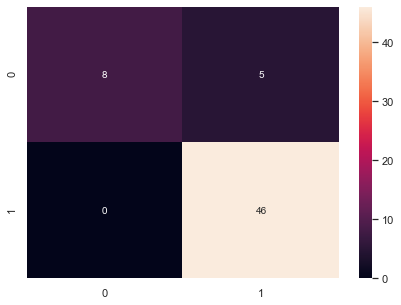

In [1190]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_lr, annot=True)

plt.show() 

In [1191]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_lr[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_lr[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_lr[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_lr[1][0]

In [1192]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of logistic regression classifier on test set: 91.53%
Misclassification Rate: It is often wrong: 8.47%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 61.54%
Precision: When it predicts yes, how often is it correct: 90.20%


#### K Nearest Neighbour Algorithm

In [1193]:
print(classification_report(y_test,y_pred_knn))
cm_knn = confusion_matrix(y_test,y_pred_knn)
# print(cm_knn)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



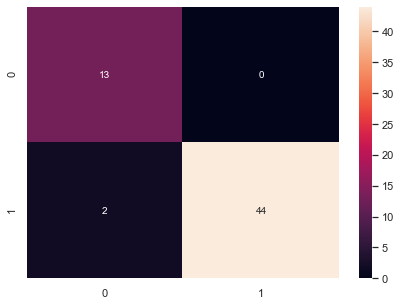

In [1194]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_knn, annot=True)

plt.show()

In [1195]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_knn[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_knn[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_knn[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_knn[1][0]

In [1196]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of KNN Algorithm on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of KNN Algorithm on test set: 96.61%
Misclassification Rate: It is often wrong: 3.39%
Sensitivity: When its actually yes how often it predicts yes: 95.65%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


#### Gaussian Naiye Bayes Algorithm

In [1197]:
print(classification_report(y_test,y_pred_gnb))
cm_gnb = confusion_matrix(y_test,y_pred_gnb)

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        13
           1       1.00      0.59      0.74        46

    accuracy                           0.68        59
   macro avg       0.70      0.79      0.66        59
weighted avg       0.87      0.68      0.70        59



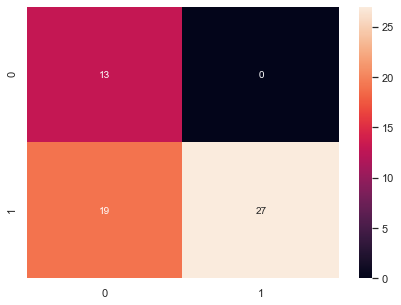

In [1198]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_gnb, annot=True)

plt.show()

In [1199]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_gnb[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_gnb[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_gnb[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_gnb[1][0]

In [1200]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Gaussian Naiye Bayes algorithm on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Gaussian Naiye Bayes algorithm on test set: 67.80%
Misclassification Rate: It is often wrong: 32.20%
Sensitivity: When its actually yes how often it predicts yes: 58.70%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


#### Support Vector Machine

In [1201]:
print(classification_report(y_test,y_pred_svc))
cm_svc = confusion_matrix(y_test,y_pred_svc)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.88      1.00      0.94        46

    accuracy                           0.90        59
   macro avg       0.94      0.77      0.82        59
weighted avg       0.91      0.90      0.89        59



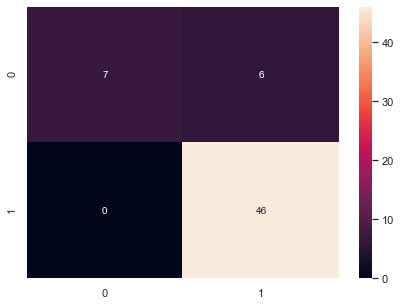

In [1202]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_svc, annot=True)

plt.show()

In [1203]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_svc[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_svc[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_svc[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_svc[1][0]

In [1204]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of SVM on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of SVM on test set: 89.83%
Misclassification Rate: It is often wrong: 10.17%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 53.85%
Precision: When it predicts yes, how often is it correct: 88.46%


####  Meta Classifier

In [1205]:
print(classification_report(y_test,y_pred_meta))
cm_meta = confusion_matrix(y_test,y_pred_meta)

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.90      0.96      0.93        46

    accuracy                           0.88        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.88      0.88      0.88        59



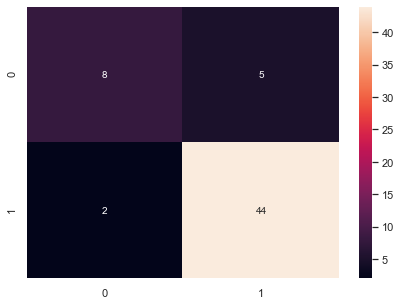

In [1206]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_meta, annot=True)

plt.show()

In [1207]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_meta[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_meta[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_meta[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_meta[1][0]

In [1208]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Meta Classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Meta Classifier on test set: 88.14%
Misclassification Rate: It is often wrong: 11.86%
Sensitivity: When its actually yes how often it predicts yes: 95.65%
Specificity: When its actually no, how often does it predict no: 61.54%
Precision: When it predicts yes, how often is it correct: 89.80%


#### Decision Tree Classifier

In [1209]:
print(classification_report(y_test,y_pred_dt))
cm_dt = confusion_matrix(y_test,y_pred_dt)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.91      0.95        46

    accuracy                           0.93        59
   macro avg       0.88      0.96      0.91        59
weighted avg       0.95      0.93      0.94        59



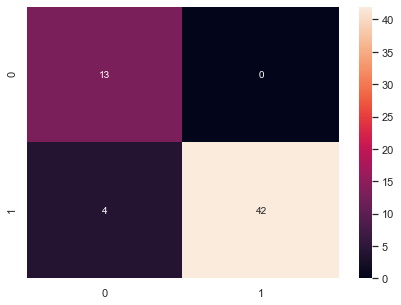

In [1210]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_dt, annot=True)

plt.show()

In [1211]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_dt[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_dt[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_dt[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_dt[1][0]

In [1212]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Decision Tree Classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Decision Tree Classifier on test set: 93.22%
Misclassification Rate: It is often wrong: 6.78%
Sensitivity: When its actually yes how often it predicts yes: 91.30%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


#### Bagging Classifier

In [1213]:
print(classification_report(y_test,y_pred_bg))
cm_bg = confusion_matrix(y_test,y_pred_bg)

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.90      0.96      0.93        46

    accuracy                           0.88        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.88      0.88      0.88        59



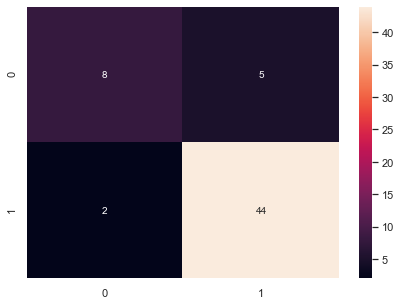

In [1214]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_bg, annot=True)

plt.show()

In [1215]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_bg[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_bg[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_bg[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_bg[1][0]

In [1216]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Bagging Classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Bagging Classifier on test set: 88.14%
Misclassification Rate: It is often wrong: 11.86%
Sensitivity: When its actually yes how often it predicts yes: 95.65%
Specificity: When its actually no, how often does it predict no: 61.54%
Precision: When it predicts yes, how often is it correct: 89.80%


#### Random Forest Classifier

In [1217]:
print(classification_report(y_test,y_pred_rf))
cm_rf = confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.96      0.98      0.97        46

    accuracy                           0.95        59
   macro avg       0.94      0.91      0.92        59
weighted avg       0.95      0.95      0.95        59



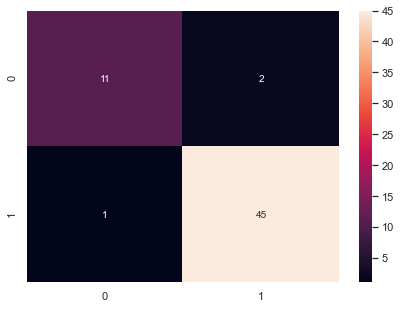

In [1218]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_rf, annot=True)

plt.show()

In [1219]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_rf[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_rf[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_rf[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_rf[1][0]

In [1220]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Random Forest on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Random Forest on test set: 94.92%
Misclassification Rate: It is often wrong: 5.08%
Sensitivity: When its actually yes how often it predicts yes: 97.83%
Specificity: When its actually no, how often does it predict no: 84.62%
Precision: When it predicts yes, how often is it correct: 95.74%


#### Adaptive Boosting Classifier

In [1221]:
print(classification_report(y_test,y_pred_ab))
cm_ab = confusion_matrix(y_test,y_pred_ab)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.98      1.00      0.99        46

    accuracy                           0.98        59
   macro avg       0.99      0.96      0.97        59
weighted avg       0.98      0.98      0.98        59



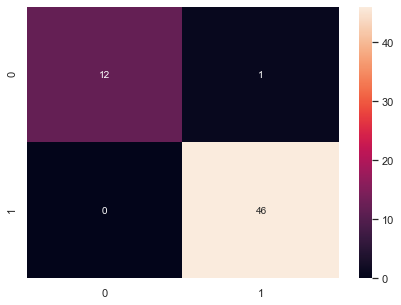

In [1222]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_ab, annot=True)

plt.show()

In [1223]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_ab[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_ab[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_ab[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_ab[1][0]

In [1224]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Adaptive Boosting on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Adaptive Boosting on test set: 98.31%
Misclassification Rate: It is often wrong: 1.69%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 92.31%
Precision: When it predicts yes, how often is it correct: 97.87%


#### Gradient Boosting Classifier

In [1225]:
print(classification_report(y_test,y_pred_gb))
cm_gb = confusion_matrix(y_test,y_pred_gb)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.96      0.93      0.95        46

    accuracy                           0.92        59
   macro avg       0.87      0.89      0.88        59
weighted avg       0.92      0.92      0.92        59



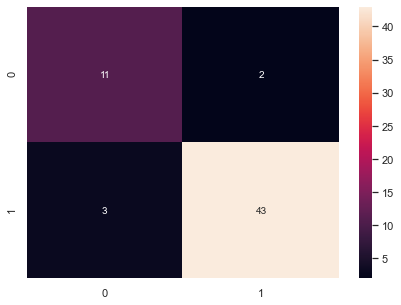

In [1226]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_gb, annot=True)

plt.show()

In [1227]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_gb[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_gb[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_gb[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_gb[1][0]

In [1228]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Gradient Boosting on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Gradient Boosting on test set: 91.53%
Misclassification Rate: It is often wrong: 8.47%
Sensitivity: When its actually yes how often it predicts yes: 93.48%
Specificity: When its actually no, how often does it predict no: 84.62%
Precision: When it predicts yes, how often is it correct: 95.56%


#### Extra Tree Classifier

In [1229]:
print(classification_report(y_test,y_pred_et))
cm_et = confusion_matrix(y_test,y_pred_et)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.96      0.98      0.97        46

    accuracy                           0.95        59
   macro avg       0.94      0.91      0.92        59
weighted avg       0.95      0.95      0.95        59



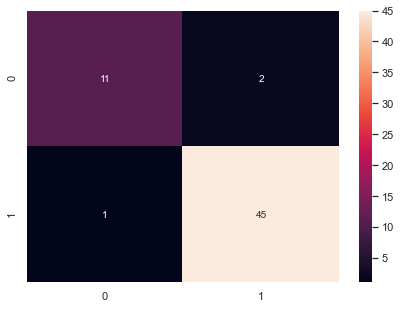

In [1230]:
plt.figure(figsize = (7,5))

sns.heatmap(cm_et, annot=True)

plt.show()

In [1231]:
#true positives (TP): These are cases in which we predicted yes, and is a PD patient
TP=cm_et[1][1]
#true negatives (TN): We predicted no, and they are not a PD patient.
TN=cm_et[0][0]
#false positives (FP): We predicted yes, but they are not a PD patient.(Also known as a "Type I error.")
FP=cm_et[0][1]
#false negatives (FN): We predicted no, but they are a PD patient.(Also known as a "Type II error.")
FN=cm_et[1][0]

In [1232]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Extra Tree Classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Extra Tree Classifier on test set: 94.92%
Misclassification Rate: It is often wrong: 5.08%
Sensitivity: When its actually yes how often it predicts yes: 97.83%
Specificity: When its actually no, how often does it predict no: 84.62%
Precision: When it predicts yes, how often is it correct: 95.74%


### Visualization of ROC Curve for all the models

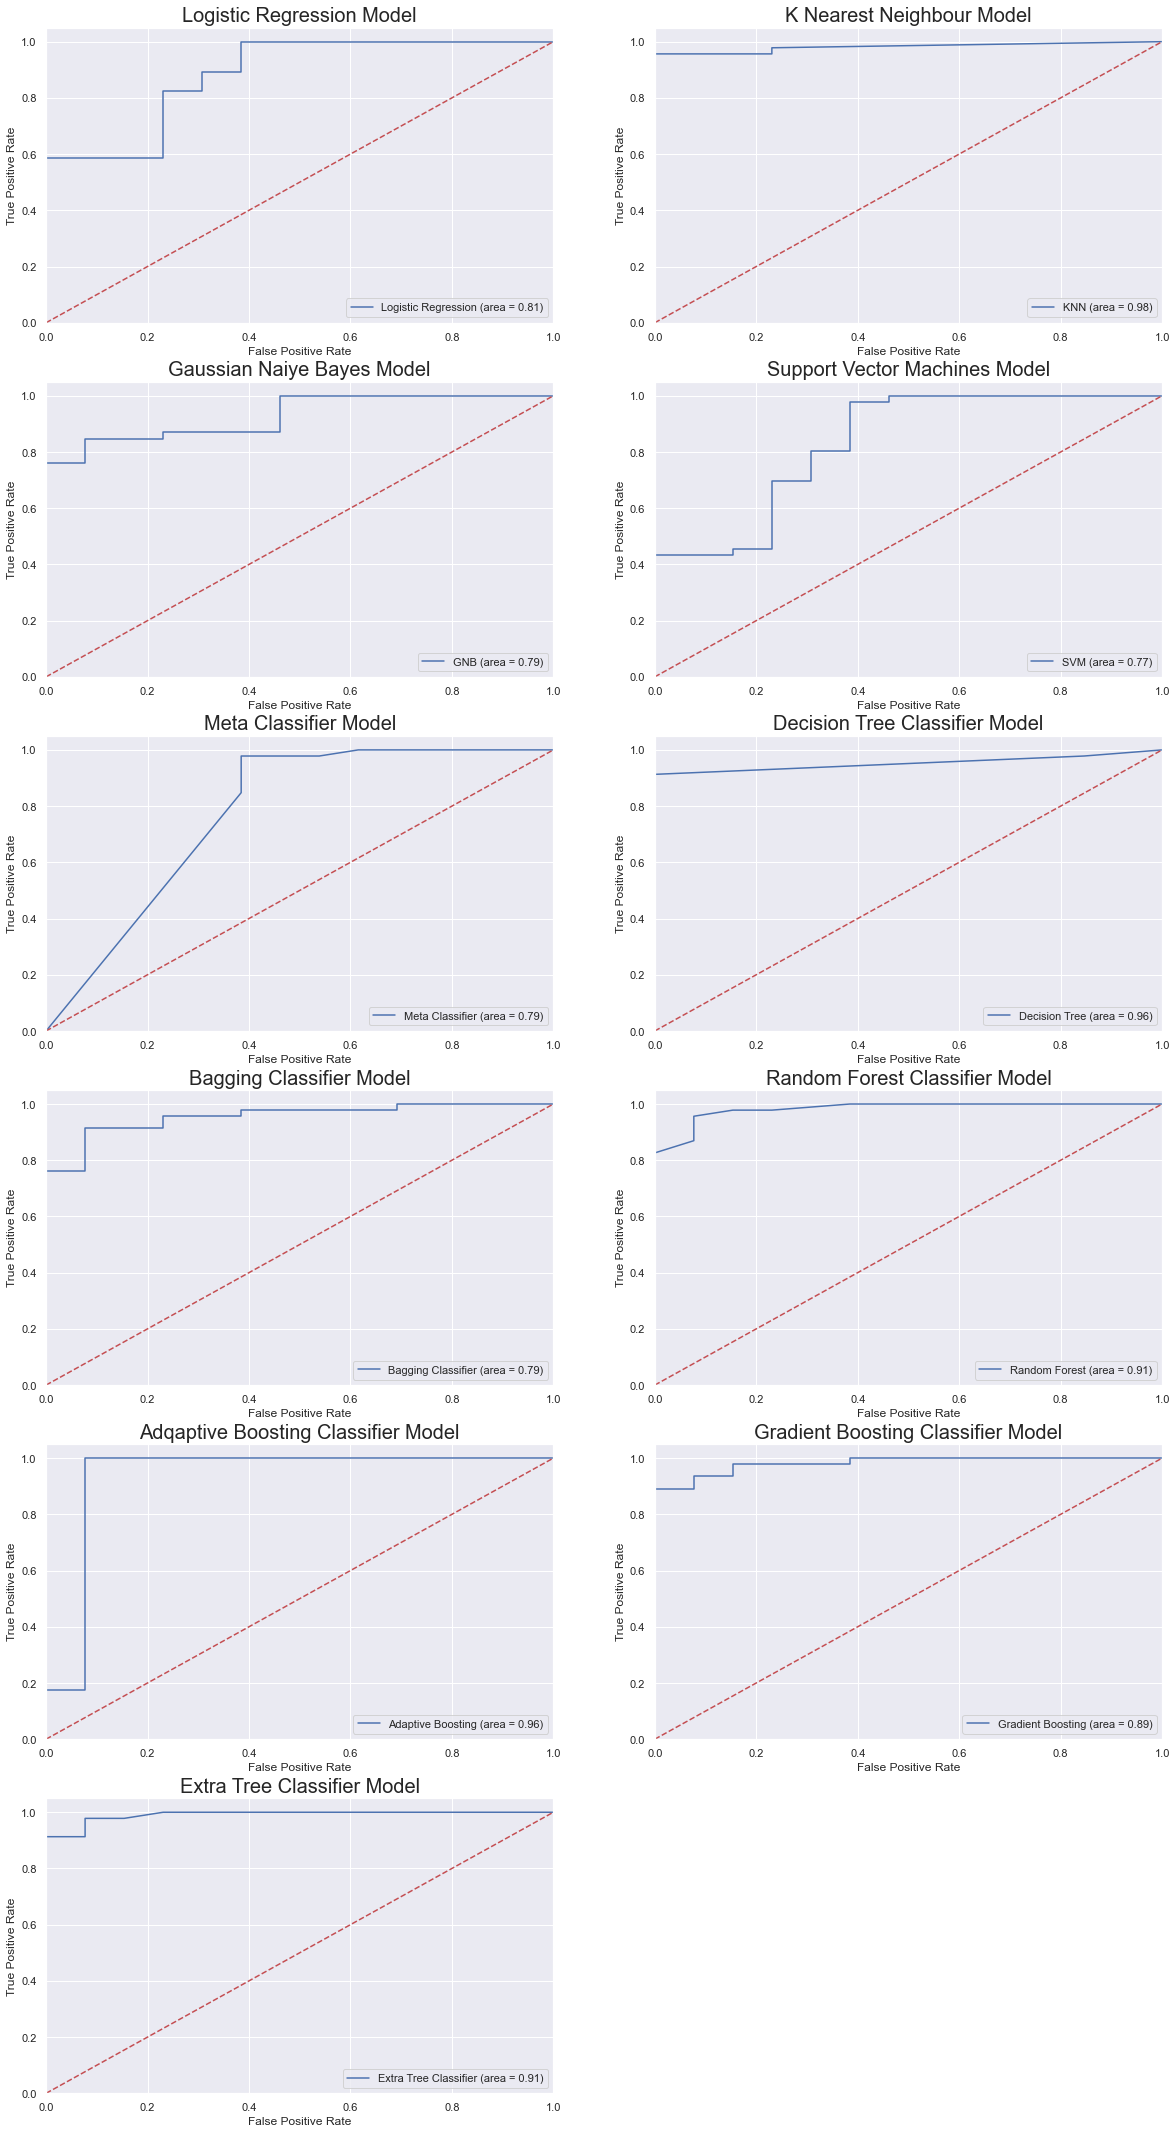

In [1233]:
plt.figure(figsize=(20,38))

#Logistic Regression

logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,1)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# K Nearest Neighbour Algorithm

KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,2)
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Nearest Neighbour Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

#Gaussian Naiye Bayes Algorithm

GNB_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,3)
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naiye Bayes Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

#Support Vector Machine Algorithm

SVM_roc_auc = roc_auc_score(y_test, svm_cl.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, svm_cl.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,4)
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machines Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()


# Meta Classifier

sc_roc_auc = roc_auc_score(y_test, sclf.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, sclf.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,5)
plt.plot(fpr, tpr, label='Meta Classifier (area = %0.2f)' % sc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Meta Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# Decision Tree Classifier Algorithm

dt_roc_auc = roc_auc_score(y_test, dTree.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, dTree.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,6)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# Bagging Classifier Algorithm

bg_roc_auc = roc_auc_score(y_test, bgcl.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, bgcl.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,7)
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % bg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# Random Forest Classifier Algorithm

rf_roc_auc = roc_auc_score(y_test, rfcl.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,8)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# AdaBoosting Algorithm

adb_roc_auc = roc_auc_score(y_test, abclf.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, abclf.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,9)
plt.plot(fpr, tpr, label='Adaptive Boosting (area = %0.2f)' % adb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adqaptive Boosting Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# Gradient Boosting Algorithm

gb_roc_auc = roc_auc_score(y_test, gbclf.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, gbclf.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,10)
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier Model', fontsize = 20)
plt.legend(loc="lower right")
# plt.show()

# Extra Tree classifier Algorithm

et_roc_auc = roc_auc_score(y_test, etclf.predict(X_test))
# print("Area under ROC: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, etclf.predict_proba(X_test)[:,1])
# plt.figure()
plt.subplot(6,2,11)
plt.plot(fpr, tpr, label='Extra Tree Classifier (area = %0.2f)' % et_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extra Tree Classifier Model', fontsize = 20)
plt.legend(loc="lower right")

plt.show()

### Visualization of all the models performance measures

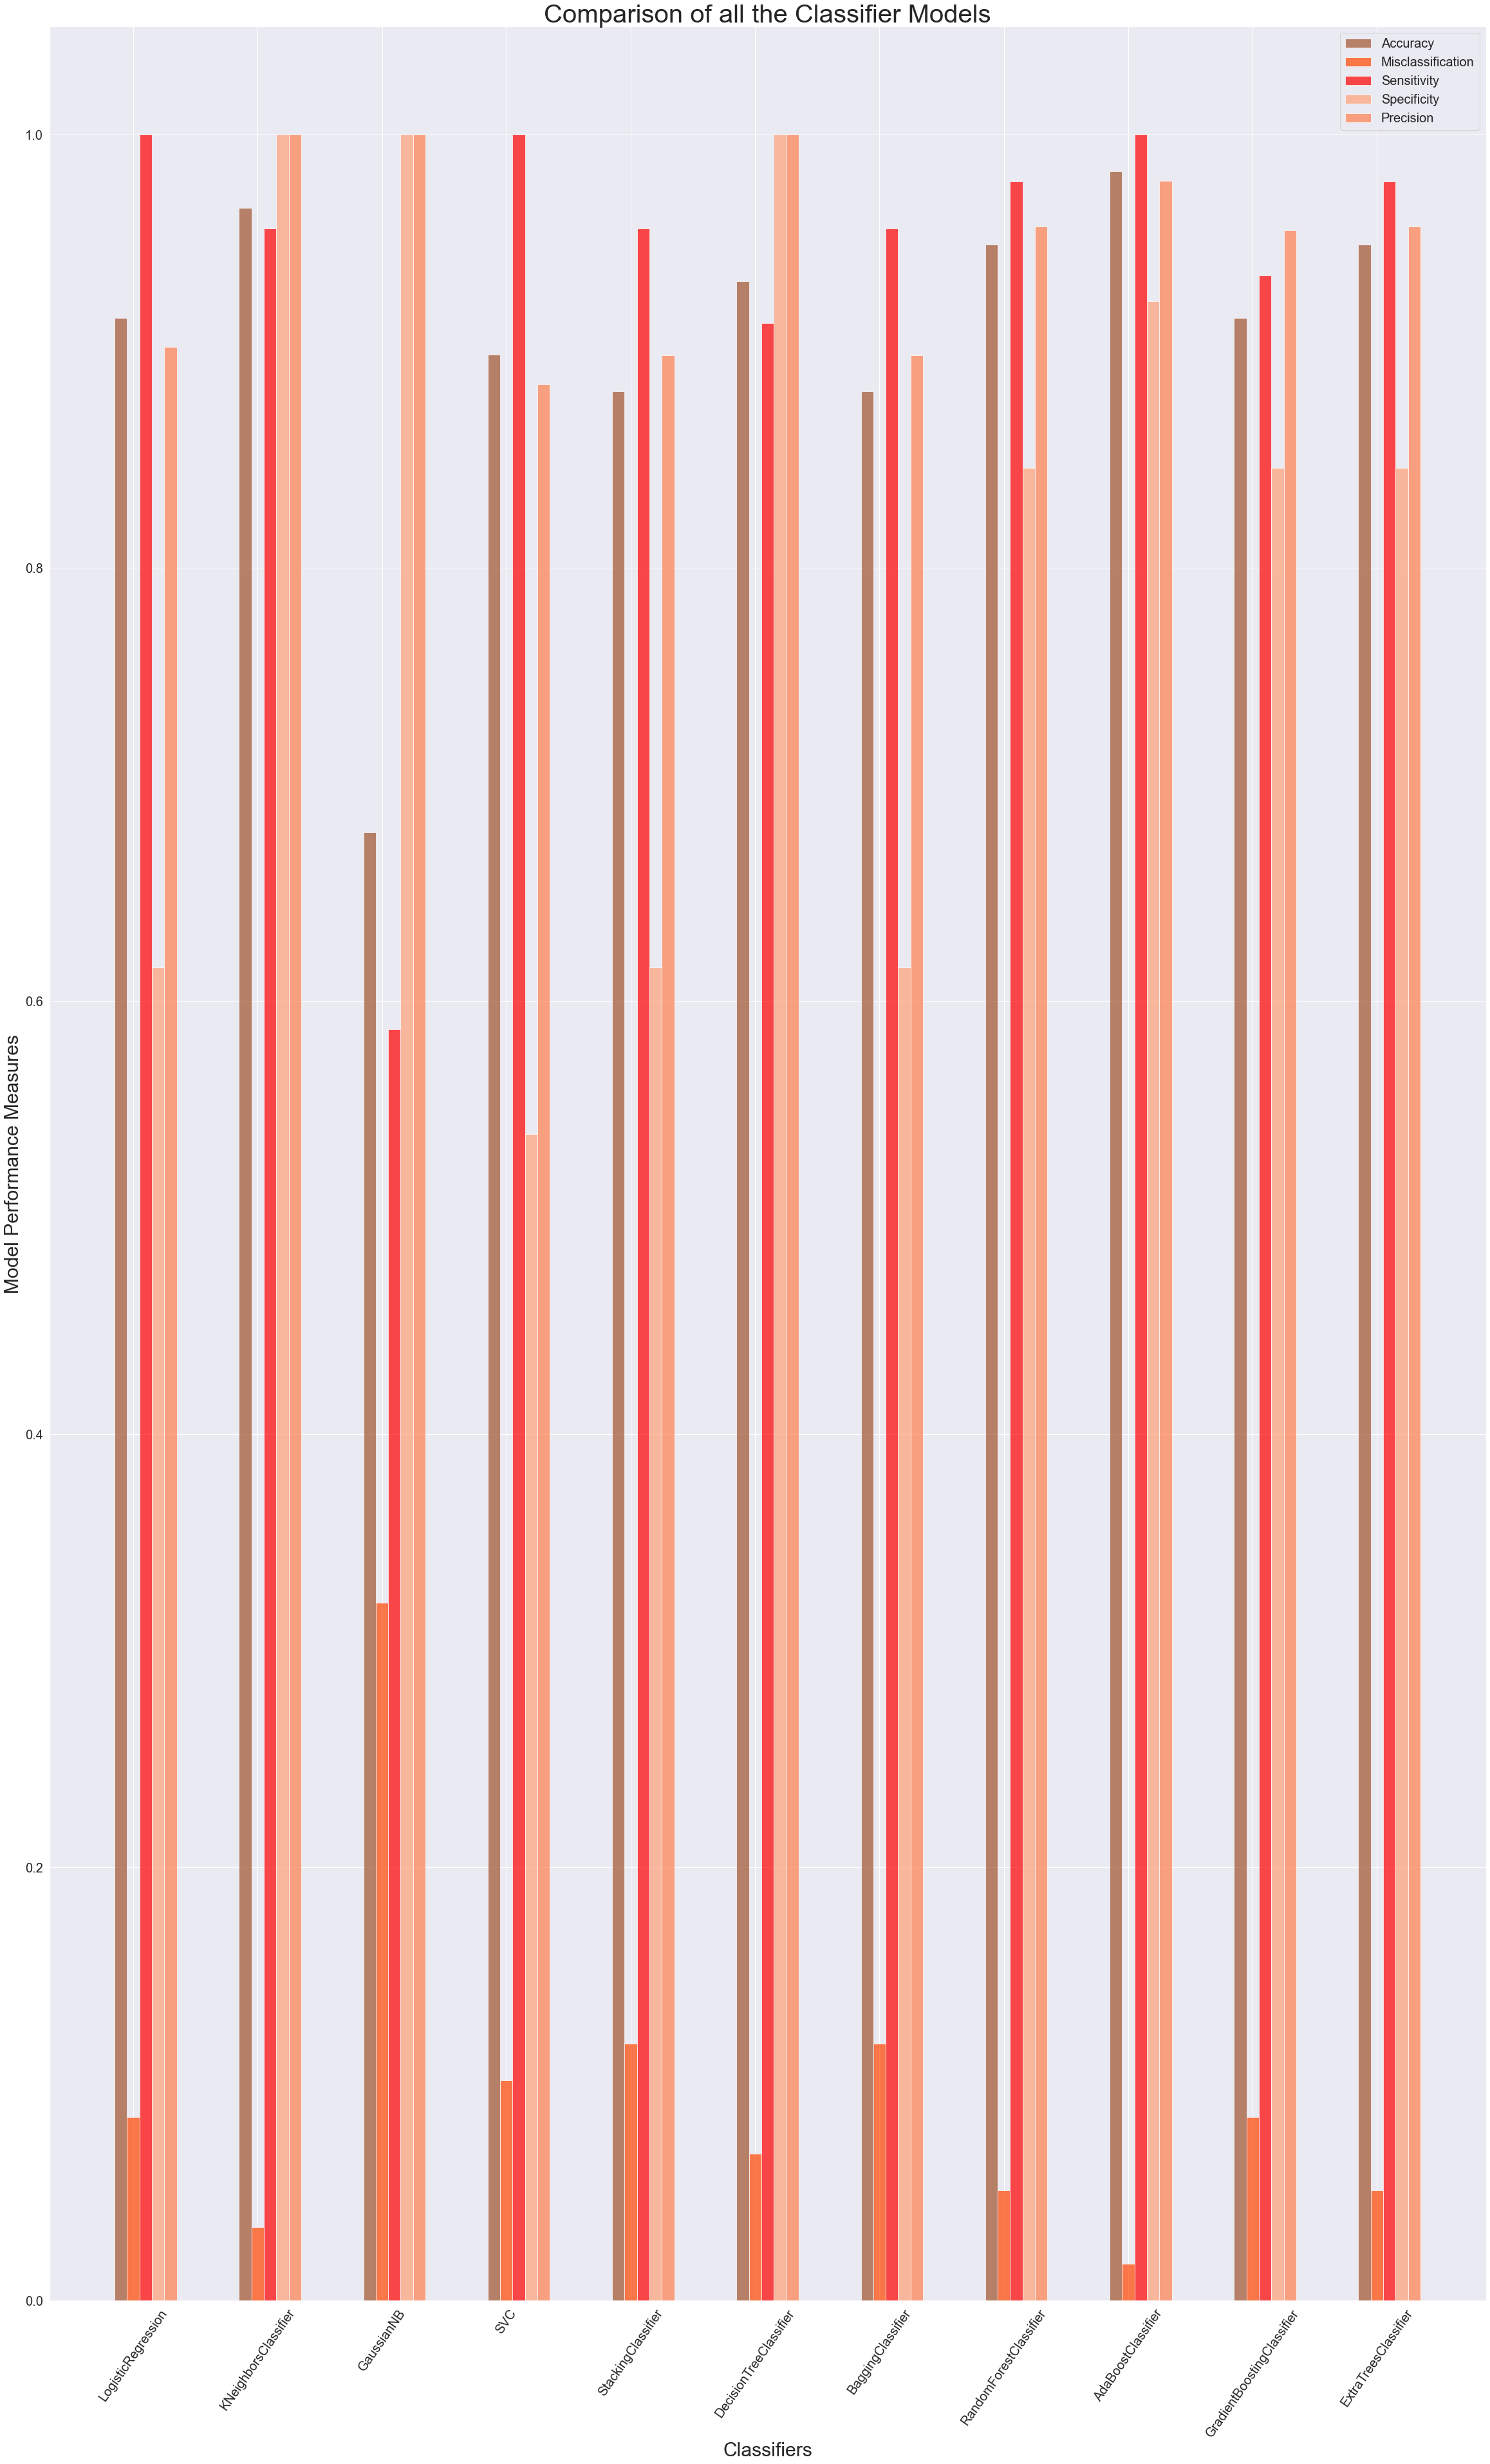

In [1234]:
#Storing the classifier names in a new list 'nm_list'

classifier_list = [logistic_model,NNH,GNB,svm_clf,sclf,dTree,bgcl,rfcl,abclf,gbclf,etclf]   
nm_list = []

#Adding the Classifier name to the new list 'nm_list'
for cls_nm in classifier_list:
#     print(cls_nm.__class__.__name__)
    nm_list.append(cls_nm.__class__.__name__)

#Creating a graph of multiple bars
ig, ax = plt.subplots(figsize=(40,65))
n_groups = 11
index = np.arange(n_groups)
# index = label
bar_width = 0.1
opacity = .7
acc_bar = ax.bar(index, acc_arr, bar_width, alpha=opacity, color='Sienna', label='Accuracy')
mis_bar = ax.bar(index + bar_width, mis_arr, bar_width, alpha=opacity, color='orangered', label='Misclassification')
sen_bar = ax.bar(index + (bar_width*2), sen_arr, bar_width, alpha=opacity, color='red', label='Sensitivity')
spec_bar = ax.bar(index + (bar_width*3), spec_arr, bar_width, alpha=opacity, color='lightsalmon', label='Specificity')
prec_bar = ax.bar(index + (bar_width*4), prec_arr, bar_width, alpha=opacity, color='coral', label='Precision')
ax.set_xlabel('Classifiers',  fontsize = 30)
ax.set_ylabel('Model Performance Measures',  fontsize = 30)
ax.set_title('Comparison of all the Classifier Models',  fontsize = 40)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(nm_list, fontsize = 17)
ax.tick_params(labelsize=20)

#Changing alignment of labels in x axis
for c in ax.get_xticklabels():
    c.set_rotation(55)
    
ax.legend(fontsize = 20, loc = 'best')

plt.show()

### Standard Classification Algorithms
#### 1. Logistic Regression Model

   - Accuracy of logistic regression classifier on test set: 91.53%
   - Misclassification Rate: It is often wrong: 8.47%
   - Sensitivity: When its actually yes how often it predicts yes: 100.00%
   - Specificity: When its actually no, how often does it predict no: 61.54%
   - Precision: When it predicts yes, how often is it correct: 90.20%

#### 2. K-Nearest Neighbour Model

   - Accuracy of KNN Algorithm on test set: 96.61%
   - Misclassification Rate: It is often wrong: 3.39%
   - Sensitivity: When its actually yes how often it predicts yes: 95.65%
   - Specificity: When its actually no, how often does it predict no: 100.00%
   - Precision: When it predicts yes, how often is it correct: 100.00%

#### 3. Gaussian Naiye Bayes Model

   - Accuracy of Gaussian Naiye Bayes algorithm on test set: 67.80%
   - Misclassification Rate: It is often wrong: 32.20%
   - Sensitivity: When its actually yes how often it predicts yes: 58.70%
   - Specificity: When its actually no, how often does it predict no: 100.00%
   - Precision: When it predicts yes, how often is it correct: 100.00%

#### 4. Support Vector Machines

   - Accuracy of SVM on test set: 89.83%
   - Misclassification Rate: It is often wrong: 10.17%
   - Sensitivity: When its actually yes how often it predicts yes: 100.00%
   - Specificity: When its actually no, how often does it predict no: 53.85%
   - Precision: When it predicts yes, how often is it correct: 88.46%
   
### Meta Classifier
<t><i>(Here, the base classifiers are  Support Vector Machines, Decision tree, Random Forest & the Meta Classifier used is Logistic Regression)</i></t>
   - Accuracy of Meta Classifier on test set: 88.14%
   - Misclassification Rate: It is often wrong: 11.86%
   - Sensitivity: When its actually yes how often it predicts yes: 95.65%
   - Specificity: When its actually no, how often does it predict no: 61.54%
   - Precision: When it predicts yes, how often is it correct: 89.80%

### Ensemble Techniques
#### 1. Decision Tree Classifier

   - Accuracy of Decision Tree Classifier on test set: 93.22%
   - Misclassification Rate: It is often wrong: 6.78%
   - Sensitivity: When its actually yes how often it predicts yes: 91.30%
   - Specificity: When its actually no, how often does it predict no: 100.00%
   - Precision: When it predicts yes, how often is it correct: 100.00%
   
#### 2. Bagging Classifier

   - Accuracy of Bagging Classifier on test set: 88.14%
   - Misclassification Rate: It is often wrong: 11.86%
   - Sensitivity: When its actually yes how often it predicts yes: 95.65%
   - Specificity: When its actually no, how often does it predict no: 61.54%
   - Precision: When it predicts yes, how often is it correct: 89.80%
  
#### 3. Random Forest

   - Accuracy of Random Forest on test set: 94.92%
   - Misclassification Rate: It is often wrong: 5.08%
   - Sensitivity: When its actually yes how often it predicts yes: 97.83%
   - Specificity: When its actually no, how often does it predict no: 84.62%
   - Precision: When it predicts yes, how often is it correct: 95.74%
   
#### 4. Adaptive Boosting

   - Accuracy of Adaptive Boosting on test set: 98.31%
   - Misclassification Rate: It is often wrong: 1.69%
   - Sensitivity: When its actually yes how often it predicts yes: 100.00%
   - Specificity: When its actually no, how often does it predict no: 92.31%
   - Precision: When it predicts yes, how often is it correct: 97.87%
   
#### 5. Gradient Boosting

   - Accuracy of Gradient Boosting on test set: 91.53%
   - Misclassification Rate: It is often wrong: 8.47%
   - Sensitivity: When its actually yes how often it predicts yes: 93.48%
   - Specificity: When its actually no, how often does it predict no: 84.62%
   - Precision: When it predicts yes, how often is it correct: 95.56%
   
#### 6. Extra Tree Classifier

   - Accuracy of Extra Tree Classifier on test set: 94.92%
   - Misclassification Rate: It is often wrong: 5.08%
   - Sensitivity: When its actually yes how often it predicts yes: 97.83%
   - Specificity: When its actually no, how often does it predict no: 84.62%
   - Precision: When it predicts yes, how often is it correct: 95.74%

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.98      1.00      0.99        46

    accuracy                           0.98        59
   macro avg       0.99      0.96      0.97        59
weighted avg       0.98      0.98      0.98        59



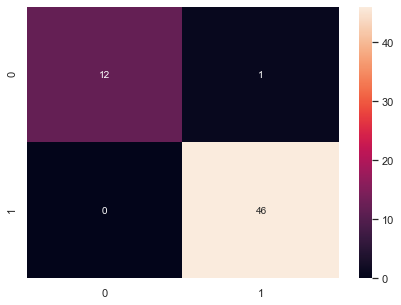

In [1235]:
print(classification_report(y_test,y_pred_ab))
cm_ab = confusion_matrix(y_test,y_pred_ab)
plt.figure(figsize = (7,5))

sns.heatmap(cm_ab, annot=True)

plt.show()

#### Conclusion:

##### As displayed in the graph, the best model would be Adaptive Boosting Algorithm

- Because this model performed the best when compared to the other models with the below rates in
  - Highest Accuracy: 98.31%
  - Lowest Misclassification: 1.69%
  - Sensitivity: 100%
- And the below rates were comparitively better in this model:  
  - Specificity: 92.31%
  - Precision: 97.87%
- Also, the area under ROC is with 0.96. (More the area under ROC better the model performs)

Also, the classification report shown above says that the model has predicted 100% for patients who are not having Parkinsons disease and an accuracy of 98% for person's who are having Parkinsons disease. Also, the confusion matrix shown above shows that only one value has been misclassified.